## Imports

In [ ]:
import os
import pandas as pd
import sys
import altair as alt
import numpy as np
import pickle
from matplotlib import pyplot
import ipywidgets as widgets
from tensorflow import keras
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
!pip install shap
import shap

# print the JS visualization code to the notebook
shap.initjs()

     |████████████████████████████████| 358kB 7.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491637 sha256=ea85ae2029e5d0df397f83020b0150e510b584a57b47643983035ee457f85647
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4ryaZ2h2jcbLGffuqIWG1QP7Vu72JEPfQ2joccZU78ncktYvxNE68
Mounted at /content/drive


In [ ]:
sns.set_style("darkgrid")

In [ ]:
target_data_folder = '/data/Regression_target_data/'
features_data_folder = '/data/Original_folds/'
class_folder = '/classes/'
export_folder = '/results/export_csv/'
labels =pd.read_csv(f"{target_data_folder}labels.txt",sep=';',index_col=False)
sys_min = sys.float_info.min
mae_folder = f'/results/mae/'
predictions_folder = f'/results/predictions/'
models_folder = f'/results/models/'
multi_target_folder = 'multi_target_output/'
single_output_folder = 'single_output_models/'
regression_multi = 'random_forest_n_estimators=75_max_depth=25_criterion=mae/'
regression_single = 'random_forest_n_estimators=25_max_depth=25_criterion=mae/'
algorithm_no = 0
algorithm_folder = f'alg_no_0_1_2/'
fold = 0

### Folder init

In [ ]:
shap_function_level_folder_multi_alg_0 = f'{export_folder}{algorithm_folder}{multi_target_folder}function_level_shaps/{regression_multi}alg_0/'
shap_algorithm_level_folder_multi_alg_0 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_0/'
mae_funtion_level_folder_multi_alg_0 = f'{export_folder}{algorithm_folder}{multi_target_folder}function_level_mae/{regression_multi}alg_0/'
mae_algorithm_level_folder_multi_alg_0 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_mae/{regression_multi}alg_0/'

In [ ]:
os.makedirs(shap_function_level_folder_multi_alg_0, exist_ok=True)
os.makedirs(shap_algorithm_level_folder_multi_alg_0, exist_ok=True)
os.makedirs(mae_funtion_level_folder_multi_alg_0, exist_ok=True)
os.makedirs(mae_algorithm_level_folder_multi_alg_0, exist_ok=True)

In [ ]:
shap_function_level_folder_multi_alg_1 = f'{export_folder}{algorithm_folder}{multi_target_folder}function_level_shaps/{regression_multi}alg_1/'
shap_algorithm_level_folder_multi_alg_1 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_1/'
mae_funtion_level_folder_multi_alg_1 = f'{export_folder}{algorithm_folder}{multi_target_folder}function_level_mae/{regression_multi}alg_1/'
mae_algorithm_level_folder_multi_alg_1 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_mae/{regression_multi}alg_1/'

In [ ]:
os.makedirs(shap_function_level_folder_multi_alg_1, exist_ok=True)
os.makedirs(shap_algorithm_level_folder_multi_alg_1, exist_ok=True)
os.makedirs(mae_funtion_level_folder_multi_alg_1, exist_ok=True)
os.makedirs(mae_algorithm_level_folder_multi_alg_1, exist_ok=True)

In [ ]:
shap_function_level_folder_multi_alg_2 = f'{export_folder}{algorithm_folder}{multi_target_folder}function_level_shaps/{regression_multi}alg_2/'
shap_algorithm_level_folder_multi_alg_2 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_2/'
mae_funtion_level_folder_multi_alg_2 = f'{export_folder}{algorithm_folder}{multi_target_folder}function_level_mae/{regression_multi}alg_2/'
mae_algorithm_level_folder_multi_alg_2 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_mae/{regression_multi}alg_2/'

In [ ]:
os.makedirs(shap_function_level_folder_multi_alg_2, exist_ok=True)
os.makedirs(shap_algorithm_level_folder_multi_alg_2, exist_ok=True)
os.makedirs(mae_funtion_level_folder_multi_alg_2, exist_ok=True)
os.makedirs(mae_algorithm_level_folder_multi_alg_2, exist_ok=True)

In [ ]:
shap_function_level_folder_single_alg_0 = f'{export_folder}{algorithm_folder}{single_output_folder}function_level_shaps/{regression_single}alg_0/'
shap_algorithm_level_folder_single_alg_0 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_0/'
mae_funtion_level_folder_single_alg_0= f'{export_folder}{algorithm_folder}{single_output_folder}function_level_mae/{regression_single}alg_0/'
mae_algorithm_level_folder_single_alg_0 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_mae/{regression_single}alg_0/'

In [ ]:
os.makedirs(shap_function_level_folder_single_alg_0, exist_ok=True)
os.makedirs(shap_algorithm_level_folder_single_alg_0, exist_ok=True)
os.makedirs(mae_funtion_level_folder_single_alg_0, exist_ok=True)
os.makedirs(mae_algorithm_level_folder_single_alg_0, exist_ok=True)

In [ ]:
shap_function_level_folder_single_alg_1 = f'{export_folder}{algorithm_folder}{single_output_folder}function_level_shaps/{regression_single}alg_1/'
shap_algorithm_level_folder_single_alg_1 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_1/'
mae_funtion_level_folder_single_alg_1 = f'{export_folder}{algorithm_folder}{single_output_folder}function_level_mae/{regression_single}alg_1/'
mae_algorithm_level_folder_single_alg_1 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_mae/{regression_single}alg_1/'

In [ ]:
os.makedirs(shap_function_level_folder_single_alg_1, exist_ok=True)
os.makedirs(shap_algorithm_level_folder_single_alg_1, exist_ok=True)
os.makedirs(mae_funtion_level_folder_single_alg_1, exist_ok=True)
os.makedirs(mae_algorithm_level_folder_single_alg_1, exist_ok=True)

In [ ]:
shap_function_level_folder_single_alg_2 = f'{export_folder}{algorithm_folder}{single_output_folder}function_level_shaps/{regression_single}alg_2/'
shap_algorithm_level_folder_single_alg_2 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_2/'
mae_funtion_level_folder_single_alg_2 = f'{export_folder}{algorithm_folder}{single_output_folder}function_level_mae/{regression_single}alg_2/'
mae_algorithm_level_folder_single_alg_2 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_mae/{regression_single}alg_2/'

In [ ]:
os.makedirs(shap_function_level_folder_single_alg_2, exist_ok=True)
os.makedirs(shap_algorithm_level_folder_single_alg_2, exist_ok=True)
os.makedirs(mae_funtion_level_folder_single_alg_2, exist_ok=True)
os.makedirs(mae_algorithm_level_folder_single_alg_2, exist_ok=True)

## Helper Functions

In [ ]:
def create_data(df,df_perf,labels):
    df2 = df_perf.assign(label = labels['x'])
    df2 = df2.rename(columns={'1' : 'Precision'})
    data = df.join(df2.set_index('label'))
    
    return data

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    df = df[df.replace([-np.inf], sys.float_info.min).notnull().all(axis=1)]
    
    return df[indices_to_keep].astype(np.float32)

In [ ]:
def get_data_for_algorith(algorithm, no_fold):
  df_perf = pd.read_csv(f"{target_data_folder}performance_0_I{algorithm}.txt",sep='\t')
  df_train = pd.read_csv(f"{features_data_folder}train_{no_fold}_fused.csv",sep='\t', index_col=0)
  df_test = pd.read_csv(f"{features_data_folder}test_{no_fold}_fused.csv",sep='\t', index_col=0)
  df_perf = df_perf.iloc[:,2:3]

  rez_test = create_data(df_test,df_perf,labels)
  rez_train = create_data(df_train,df_perf,labels)
  
  return rez_train, rez_test

In [ ]:
# Check valid data
def valid_data(df):
  if len(df[df.isin([np.nan, np.inf, -np.inf]).any(1)]) == 0:
    return True
  else:
    return False

In [ ]:
def add_log_performance(df):
  df['log_Precision'] = np.log10(df.iloc[:, -1]+1)
  
  return df

In [ ]:
def get_data(algorithm_no, fold):
  train_df, test_df = get_data_for_algorith(algorithm_no, fold)

  train_df_with_log = add_log_performance(train_df)
  test_df_with_log = add_log_performance(test_df) 

  train_df_with_log_clean = clean_dataset(train_df_with_log)
  test_df_with_log_clean = clean_dataset(test_df_with_log)  

  if valid_data(train_df_with_log_clean) and valid_data(test_df_with_log_clean):
      X_train = train_df_with_log_clean.iloc[:, :-2]
      y_train_labels = train_df_with_log_clean.iloc[:, -2:]

      X_test = test_df_with_log_clean.iloc[:, :-2]
      y_test_labels = test_df_with_log_clean.iloc[:, -2:]

      return X_train, y_train_labels, X_test, y_test_labels
  else:
    raise Exception("Invalid Data")

In [ ]:
def get_dictonary_function_id_with_index(df):
  index = list(df.index)
  fid_index_dict = {}
  functions_order = []
  for fid in index:
    f = fid.split('_')[0]
    fid_index = index.index(fid)
    functions_order.append(f)

    if f in fid_index_dict:
      index_list = fid_index_dict.get(f)
      index_list.append(fid_index)
    
    else:
      fid_index_dict[f] = [fid_index]

  return fid_index_dict, functions_order



In [ ]:
mae_multi_target = pd.read_csv(f'{mae_folder}{multi_target_folder}{regression_multi}mae_alg_no_0_1_2_multi_output_model.csv')
mae_single_target = pd.read_csv(f'{mae_folder}{single_output_folder}{regression_single}mae_alg_no_0_1_2_single_output_models.csv')

In [ ]:
mae_single_target_flat = mae_single_target.groupby(['Fold'], as_index=False).mean()

In [ ]:
single_multi_output = pd.merge(mae_single_target_flat, mae_multi_target, on='Fold')

In [ ]:
single_multi_output

Fold  Unnamed: 0_x        MAE  ...  Algorithm Precision_mae  log_Precision_mae
0      0             1  12.907247  ...      0_1_2     22.654130           8.922435
1      1             4   8.274917  ...      0_1_2     15.310302           6.080645
2      2             7   8.014465  ...      0_1_2     22.144382          14.440223
3      3            10  16.114976  ...      0_1_2     23.860190          17.131060
4      4            13  15.265641  ...      0_1_2     21.148636           7.290507
5      5            16  11.345974  ...      0_1_2     17.229162          10.795161
6      6            19   5.866444  ...      0_1_2     17.540918           7.831959
7      7            22  18.634810  ...      0_1_2     39.220966          12.045946
8      8            25  13.648727  ...      0_1_2     23.427314          10.712565
9      9            28  21.122310  ...      0_1_2     26.691242          15.847871
10    10            31  16.406154  ...      0_1_2     16.587635           9.750815
11    11            34  28.291776  ...      0_1_2     40.905903          22.054269
12    12            37  13.417584  ...      0_1_2     21.050024          15.297867
13    13            40  12.629683  ...      0_1_2     21.293536           9.390085
14    14            43  17.639472  ...      0_1_2     24.102255          16.997685
15    15            46  17.620812  ...      0_1_2     26.140829          15.391044
16    16            49  18.787356  ...      0_1_2     25.494886          20.549541
17    17            52  23.317784  ...      0_1_2     43.376900          16.682581
18    18            55   7.482520  ...      0_1_2     15.869827           4.637421
19    19            58  52.754011  ...      0_1_2     70.900347          42.893477
20    20            61   9.841572  ...      0_1_2     11.858788           4.934391
21    21            64  13.416506  ...      0_1_2     25.470844           9.100971
22    22            67  14.429265  ...      0_1_2     17.991485           9.955236
23    23            70  13.959535  ...      0_1_2     19.141186           8.902839
24    24            73  18.431406  ...      0_1_2     21.054382          16.536634
25    25            76  16.503065  ...      0_1_2     20.361771          13.783398
26    26            79   6.698813  ...      0_1_2     15.168074           4.847220
27    27            82  11.219595  ...      0_1_2     14.068251          13.586651
28    28            85   8.002442  ...      0_1_2     14.560124          10.874202
29    29            88  10.121121  ...      0_1_2     13.947174           5.513402
30    30            91  10.433454  ...      0_1_2     17.544856          14.183622
31    31            94   9.184714  ...      0_1_2     13.711798           7.537639
32    32            97  11.574943  ...      0_1_2     21.650232           7.516563
33    33           100  11.569315  ...      0_1_2     18.315015          11.581022
34    34           103  11.279018  ...      0_1_2     23.103420           5.674068
35    35           106  19.102232  ...      0_1_2     35.022873          11.339881
36    36           109  12.722825  ...      0_1_2     20.390062          14.015026
37    37           112  13.508452  ...      0_1_2     18.746787          11.023482
38    38           115  17.227594  ...      0_1_2     22.502002           7.528767
39    39           118  13.199415  ...      0_1_2     15.908636          16.882508
40    40           121  11.722130  ...      0_1_2     20.356055           8.556781
41    41           124  12.861113  ...      0_1_2     18.613066          13.396937
42    42           127  37.249419  ...      0_1_2     51.837885          42.153804
43    43           130   8.256153  ...      0_1_2     11.193261           7.625145
44    44           133  11.393169  ...      0_1_2     20.350309           9.717716
45    45           136  17.653316  ...      0_1_2     26.291507           8.085885
46    46           139  10.800744  ...      0_1_2     11.760772           6.414849
47    47           1

In [ ]:
mae_merged_renamed = single_multi_output.rename(columns={'Precision_mae': 'Precision Multi-output MAE', 'MAE': 'Precision Single-output MAE'})

In [ ]:
test_dfs_multioutput = []
test_dfs_singleoutput = []

In [ ]:
algorithm_folder = f'predictions_alg_no_{algorithm_no}/'
predictions_multioutput = os.listdir(predictions_folder + multi_target_folder + regression_multi)
pwd_folder = predictions_folder + multi_target_folder + regression_multi
for prediction in predictions_multioutput:
  prediction_df = pd.read_csv(pwd_folder + prediction)
  test_dfs_multioutput.append(prediction_df)


predictions_singleoutput = os.listdir(predictions_folder + single_output_folder + regression_single)
pwd_folder = predictions_folder + single_output_folder + regression_single
for prediction in predictions_singleoutput:
  prediction_df = pd.read_csv(pwd_folder + prediction)
  test_dfs_singleoutput.append(prediction_df)

In [ ]:
test_multioutput_df = pd.concat(test_dfs_multioutput)
test_singleoutput_df = pd.concat(test_dfs_singleoutput)

In [ ]:
test_multioutput_df.index = test_multioutput_df['Index_col']
test_singleoutput_df.index = test_singleoutput_df['Index_col']

In [ ]:
fid_dict_multi, functions_ids_multi = get_dictonary_function_id_with_index(test_multioutput_df)
fid_dict_single, functions_ids_single = get_dictonary_function_id_with_index(test_singleoutput_df)

In [ ]:
test_multioutput_df.index.name = None
test_singleoutput_df.index.name = None

In [ ]:
test_multioutput_df['f_id'] = functions_ids_multi
test_singleoutput_df['f_id'] = functions_ids_single

In [ ]:
test_singleoutput_df

Unnamed: 0  Precision_alg0_prediction  ...  Precision_alg2_real f_id
10_1       10_1                 186.635324  ...                  NaN   10
11_1       11_1                  32.800110  ...                  NaN   11
12_1       12_1                 187.806247  ...                  NaN   12
13_1       13_1                  16.436457  ...                  NaN   13
14_1       14_1                   1.369456  ...                  NaN   14
...         ...                        ...  ...                  ...  ...
5_50       5_50                        NaN  ...         0.000000e+00    5
6_50       6_50                        NaN  ...         8.050472e-10    6
7_50       7_50                        NaN  ...         0.000000e+00    7
8_50       8_50                        NaN  ...         3.930839e-01    8
9_50       9_50                        NaN  ...         7.521641e-09    9

[3600 rows x 11 columns]

In [ ]:
test_singleoutput_df

Unnamed: 0  Precision_alg0_prediction  ...  Precision_alg2_real f_id
10_1       10_1                 186.635324  ...                  NaN   10
11_1       11_1                  32.800110  ...                  NaN   11
12_1       12_1                 187.806247  ...                  NaN   12
13_1       13_1                  16.436457  ...                  NaN   13
14_1       14_1                   1.369456  ...                  NaN   14
...         ...                        ...  ...                  ...  ...
5_50       5_50                        NaN  ...         0.000000e+00    5
6_50       6_50                        NaN  ...         8.050472e-10    6
7_50       7_50                        NaN  ...         0.000000e+00    7
8_50       8_50                        NaN  ...         3.930839e-01    8
9_50       9_50                        NaN  ...         7.521641e-09    9

[3600 rows x 11 columns]

In [ ]:
if 'Precision_alg0_real' in test_singleoutput_df.columns.tolist():
  test_singleoutput_df_alg_0 = test_singleoutput_df.loc[test_singleoutput_df['Precision_alg0_real'].notna()]
if 'Precision_alg1_real' in test_singleoutput_df.columns.tolist():
  test_singleoutput_df_alg_1 = test_singleoutput_df.loc[test_singleoutput_df['Precision_alg1_real'].notna()]
if 'Precision_alg2_real' in test_singleoutput_df.columns.tolist():
  test_singleoutput_df_alg_2 = test_singleoutput_df.loc[test_singleoutput_df['Precision_alg2_real'].notna()]  

In [ ]:
test_singleoutput_df_alg_0 = test_singleoutput_df_alg_0[['Index_col',	'Algorithm', 'Fold', 'Precision_alg0_prediction', 'Precision_alg0_real','f_id']]
test_singleoutput_df_alg_1 = test_singleoutput_df_alg_1[['Index_col',	'Algorithm', 'Fold', 'Precision_alg1_prediction', 'Precision_alg1_real','f_id']]
test_singleoutput_df_alg_2 = test_singleoutput_df_alg_2[['Index_col',	'Algorithm', 'Fold', 'Precision_alg2_prediction', 'Precision_alg2_real','f_id']]

In [ ]:
test_singleoutput_df_alg_0_renamed = test_singleoutput_df_alg_0.rename(columns={'Precision_alg0_prediction': 'Prediction Single-output Alg 0', 'Precision_alg0_real': 'Single-output Target Alg 0'})
test_singleoutput_df_alg_1_renamed = test_singleoutput_df_alg_1.rename(columns={'Precision_alg1_prediction': 'Prediction Single-output Alg 1', 'Precision_alg1_real': 'Single-output Target Alg 1'})
test_singleoutput_df_alg_2_renamed = test_singleoutput_df_alg_2.rename(columns={'Precision_alg2_prediction': 'Prediction Single-output Alg 2', 'Precision_alg2_real': 'Single-output Target Alg 2'})

In [ ]:
test_multioutput_df.head()

Unnamed: 0  Precision_alg0_prediction  ...  Fold  f_id
10_1       10_1                 128.210748  ...     0    10
11_1       11_1                  65.513210  ...     0    11
12_1       12_1                 229.282714  ...     0    12
13_1       13_1                  24.096009  ...     0    13
14_1       14_1                   5.921939  ...     0    14

[5 rows x 11 columns]

In [ ]:
if 'Precision_alg0_real' in test_multioutput_df.columns.tolist():
  test_multioutput_df_alg_0 = test_multioutput_df.loc[test_multioutput_df['Precision_alg0_real'].notna()]
if 'Precision_alg1_real' in test_multioutput_df.columns.tolist():
  test_multioutput_df_alg_1 = test_multioutput_df.loc[test_multioutput_df['Precision_alg1_real'].notna()]
if 'Precision_alg2_real' in test_multioutput_df.columns.tolist():
  test_multioutput_df_alg_2 = test_multioutput_df.loc[test_multioutput_df['Precision_alg2_real'].notna()]  

In [ ]:
test_multioutput_df_alg_0 = test_multioutput_df_alg_0[['Index_col',	'Algorithm', 'Fold', 'Precision_alg0_prediction', 'Precision_alg0_real','f_id']]
test_multioutput_df_alg_1 = test_multioutput_df_alg_1[['Index_col',	'Algorithm', 'Fold', 'Precision_alg1_prediction', 'Precision_alg1_real','f_id']]
test_multioutput_df_alg_2 = test_multioutput_df_alg_2[['Index_col',	'Algorithm', 'Fold', 'Precision_alg2_prediction', 'Precision_alg2_real','f_id']]

In [ ]:
test_multioutput_df_alg_0_renamed = test_multioutput_df_alg_0.rename(columns={'Precision_alg0_prediction': 'Prediction Multi-output Alg 0', 'Precision_alg0_real': 'Multi-output Target Alg 0'})
test_multioutput_df_alg_1_renamed = test_multioutput_df_alg_1.rename(columns={'Precision_alg1_prediction': 'Prediction Multi-output Alg 1', 'Precision_alg1_real': 'Multi-output Target Alg 1'})
test_multioutput_df_alg_2_renamed = test_multioutput_df_alg_2.rename(columns={'Precision_alg2_prediction': 'Prediction Multi-output Alg 2', 'Precision_alg2_real': 'Multi-output Target Alg 2'})

In [ ]:
single_multi_alg_0 = pd.merge(test_multioutput_df_alg_0_renamed, test_singleoutput_df_alg_0_renamed, on='Index_col')
single_multi_alg_1 = pd.merge(test_multioutput_df_alg_1_renamed, test_singleoutput_df_alg_1_renamed, on='Index_col')
single_multi_alg_2 = pd.merge(test_multioutput_df_alg_2_renamed, test_singleoutput_df_alg_2_renamed, on='Index_col')

In [ ]:
test_multioutput_df_0_melted = pd.melt(test_multioutput_df, id_vars=['f_id'], value_vars=["Precision_alg0_prediction", "Precision_alg0_real"])
test_multioutput_df_1_melted = pd.melt(test_multioutput_df, id_vars=['f_id'], value_vars=["Precision_alg1_prediction", "Precision_alg1_real"])
test_multioutput_df_2_melted = pd.melt(test_multioutput_df, id_vars=['f_id'], value_vars=["Precision_alg2_prediction", "Precision_alg2_real"])

In [ ]:
test_singleoutput_df_0_melted = pd.melt(test_singleoutput_df, id_vars=['f_id'], value_vars=["Precision_alg0_prediction", "Precision_alg0_real"])
test_singleoutput_df_1_melted = pd.melt(test_singleoutput_df, id_vars=['f_id'], value_vars=["Precision_alg1_prediction", "Precision_alg1_real"])
test_singleoutput_df_2_melted = pd.melt(test_singleoutput_df, id_vars=['f_id'], value_vars=["Precision_alg2_prediction", "Precision_alg2_real"])

In [ ]:
single_multi_merge_0 = pd.merge(test_multioutput_df_alg_0_renamed, test_singleoutput_df_alg_0_renamed, on='Index_col')
single_multi_merge_1 = pd.merge(test_multioutput_df_alg_1_renamed, test_singleoutput_df_alg_1_renamed, on='Index_col')
single_multi_merge_2 = pd.merge(test_multioutput_df_alg_2_renamed, test_singleoutput_df_alg_2_renamed, on='Index_col')

In [ ]:
single_multi_merge_0

Index_col Algorithm_x  ...  Single-output Target Alg 0  f_id_y
0         10_1       0_1_2  ...                  148.791933      10
1         11_1       0_1_2  ...                   10.553928      11
2         12_1       0_1_2  ...                   94.804217      12
3         13_1       0_1_2  ...                    6.123546      13
4         14_1       0_1_2  ...                    0.000554      14
...        ...         ...  ...                         ...     ...
1195      5_50       0_1_2  ...                    0.000000       5
1196      6_50       0_1_2  ...                    0.025452       6
1197      7_50       0_1_2  ...                    0.000000       7
1198      8_50       0_1_2  ...                    1.988712       8
1199      9_50       0_1_2  ...                    1.001632       9

[1200 rows x 11 columns]

In [ ]:
single_multi_merge_0_melted = pd.melt(single_multi_merge_0, id_vars=['f_id_y'], value_vars=['Prediction Multi-output Alg 0', 'Prediction Single-output Alg 0', 'Single-output Target Alg 0'])
single_multi_merge_1_melted = pd.melt(single_multi_merge_1, id_vars=['f_id_y'], value_vars=['Prediction Multi-output Alg 1', 'Prediction Single-output Alg 1', 'Single-output Target Alg 1'])
single_multi_merge_2_melted = pd.melt(single_multi_merge_2, id_vars=['f_id_y'], value_vars=['Prediction Multi-output Alg 2', 'Prediction Single-output Alg 2', 'Single-output Target Alg 2'])

## Load Model

In [ ]:
# if regression == 'nn/':
#   model_multi = keras.models.load_model(f"{models_folder}{multi_target_folder}{regression}model_fold_no_{fold}_alg_no_{algorithm_no}")
#   model_single_precision = keras.models.load_model(f"{models_folder}{single_output_folder}{regression}model_fold_no_{fold}_alg_no_{algorithm_no}_label_Precision")
#   model_single_log_precision = keras.models.load_model(f"{models_folder}{single_output_folder}{regression}model_fold_no_{fold}_alg_no_{algorithm_no}_label_log_Precision")
# else:

filename = f"{models_folder}{multi_target_folder}{regression_multi}model_fold_no_{fold}_alg_no_0_1_2.pkl"
model_multi = pickle.load(open(filename, 'rb'))

# model_fold_no_0_alg_no_0_1_2_label_Precision_alg0

filename = f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{fold}_alg_no_0_1_2_label_Precision_alg0.pkl"
model_single_alg_0 = pickle.load(open(filename, 'rb'))

filename = f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{fold}_alg_no_0_1_2_label_Precision_alg1.pkl"
model_single_alg_1 = pickle.load(open(filename, 'rb'))

filename = f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{fold}_alg_no_0_1_2_label_Precision_alg2.pkl"
model_single_alg_2 = pickle.load(open(filename, 'rb'))

# model_multi = keras.models.load_model(f"{models_folder}{multi_target_folder}{regression_multi}model_fold_no_{fold}_alg_no_{algorithm_no}")
# model_single_precision = keras.models.load_model(f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{fold}_alg_no_{algorithm_no}_label_Precision")
# model_single_log_precision = keras.models.load_model(f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{fold}_alg_no_{algorithm_no}_label_log_Precision")

# Visualization

## SHAP

### SHAP Multi Output Model

In [ ]:
explainer = shap.TreeExplainer(model = model_multi.model)
shap_values = explainer.shap_values(X = model_multi.X_train)

#### Precision ALG 0


Current Label Shown: Precision for Alg 0 



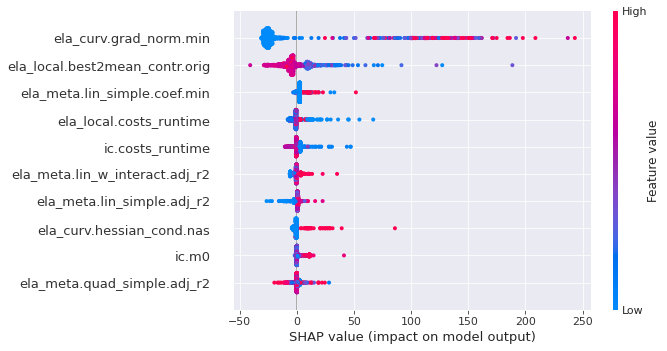

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: Precision for Alg 0 \n')

shap.summary_plot(shap_values = shap_values[0],
                  features = model_multi.X_train, max_display=10
                  ) 

#### Precision ALG 1

Current Label Shown: Precision for Alg 1 



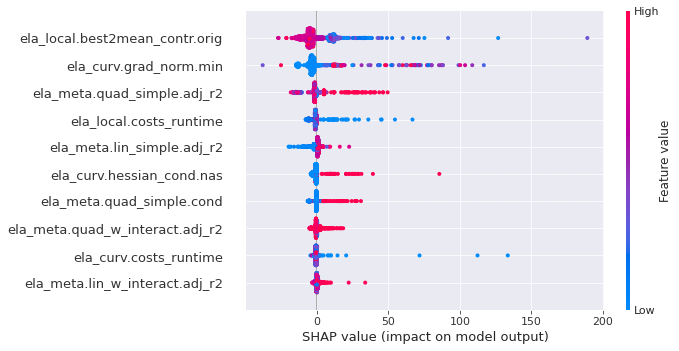

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: Precision for Alg 1 \n')

shap.summary_plot(shap_values = shap_values[1],
                  features = model_multi.X_train,  max_display=10
                  ) 

#### Precision ALG 2

Current Label Shown: Precision for Alg 2 



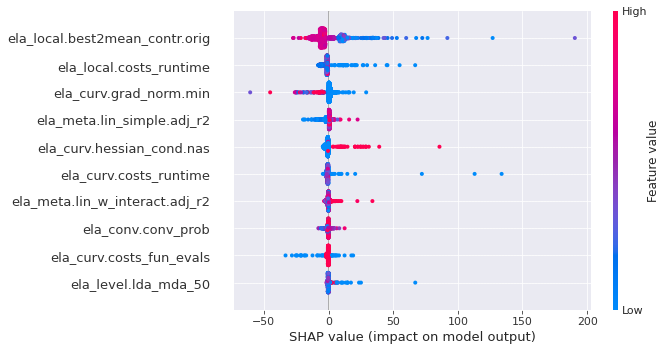

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: Precision for Alg 2 \n')

shap.summary_plot(shap_values = shap_values[2],
                  features = model_multi.X_train, max_display = 10
                  ) 

### SHAP Single Output Model

#### Precision ALG 0

In [ ]:
explainer = shap.TreeExplainer(model = model_single_alg_0.model)
shap_values = explainer.shap_values(X = model_single_alg_0.X_train)

Current Label Shown: Precision for Alg 0 



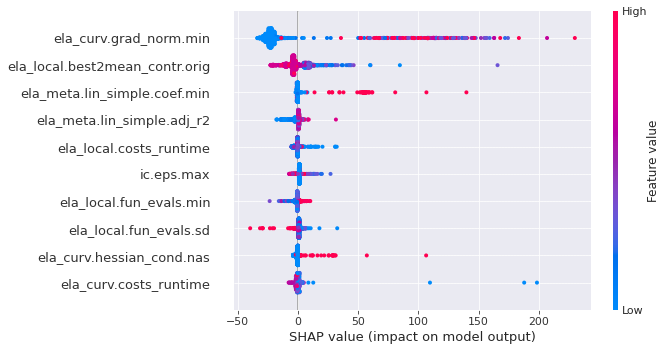

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: Precision for Alg 0 \n')

shap.summary_plot(shap_values = shap_values,
                  features = model_multi.X_train, max_display=10
                  ) 

#### Precision ALG 1

In [ ]:
explainer = shap.TreeExplainer(model = model_single_alg_1.model)
shap_values = explainer.shap_values(X = model_single_alg_1.X_train)

Current Label Shown: Precision for Alg 1 



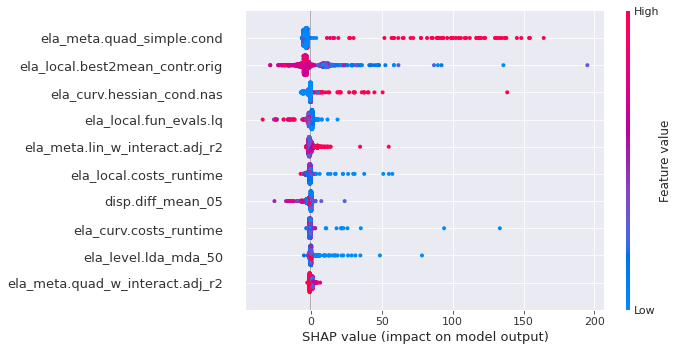

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: Precision for Alg 1 \n')

shap.summary_plot(shap_values = shap_values,
                  features = model_multi.X_train, max_display=10
                  ) 

#### Precision ALG 2

In [ ]:
explainer = shap.TreeExplainer(model = model_single_alg_2.model)
shap_values = explainer.shap_values(X = model_single_alg_2.X_train)

Current Label Shown: Precision for Alg 2 



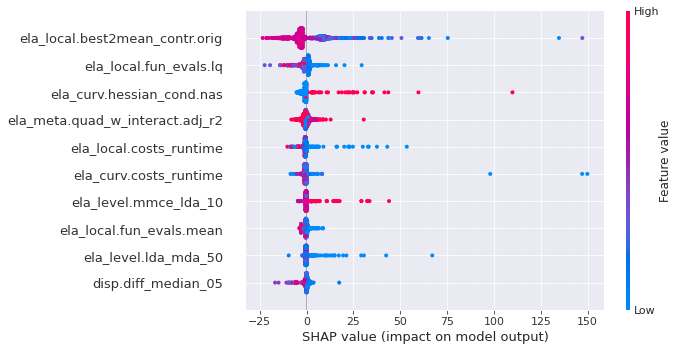

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: Precision for Alg 2 \n')

shap.summary_plot(shap_values = shap_values,
                  features = model_multi.X_train, max_display=10
                  ) 

## MAE

### MAE Single vs Multi

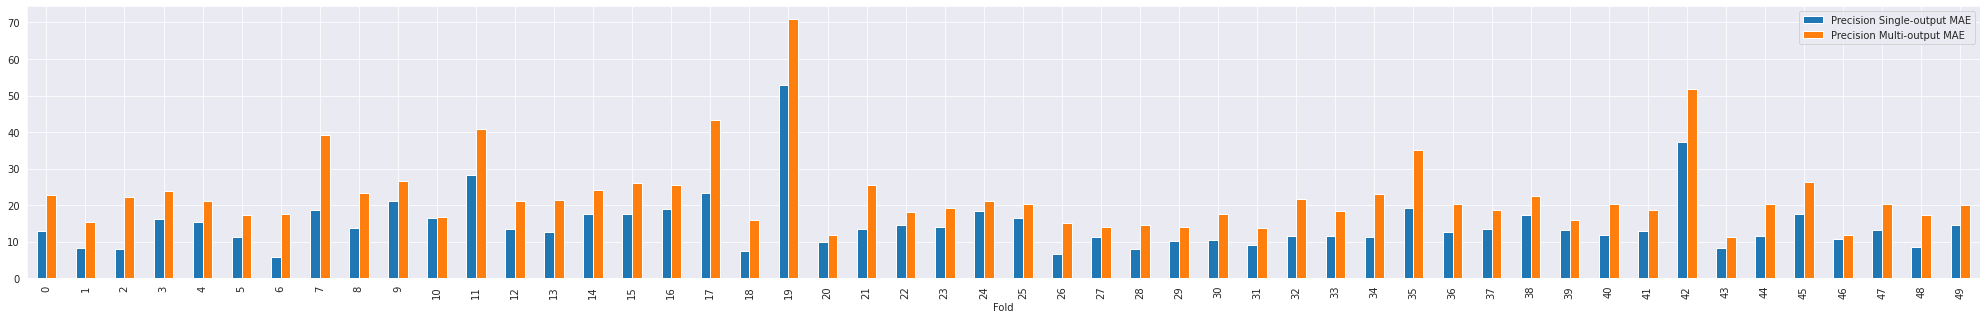

In [ ]:
mae_merged_renamed.plot(x="Fold", y=["Precision Single-output MAE", "Precision Multi-output MAE"], kind="bar", figsize=(35,5), width = 0.5)

### MAE on function level

#### Helper

In [ ]:
test_singleoutput_df


Unnamed: 0  Precision_alg0_prediction  ...  Precision_alg2_real f_id
10_1       10_1                 186.635324  ...                  NaN   10
11_1       11_1                  32.800110  ...                  NaN   11
12_1       12_1                 187.806247  ...                  NaN   12
13_1       13_1                  16.436457  ...                  NaN   13
14_1       14_1                   1.369456  ...                  NaN   14
...         ...                        ...  ...                  ...  ...
5_50       5_50                        NaN  ...         0.000000e+00    5
6_50       6_50                        NaN  ...         8.050472e-10    6
7_50       7_50                        NaN  ...         0.000000e+00    7
8_50       8_50                        NaN  ...         3.930839e-01    8
9_50       9_50                        NaN  ...         7.521641e-09    9

[3600 rows x 11 columns]

In [ ]:
mae_fid_0 = []

for i in range(1, 25):
  single_multi_precision_df_f_id_1 = test_singleoutput_df.loc[test_singleoutput_df['f_id'] == str(i)][["Precision_alg0_prediction", "Precision_alg0_real",  "f_id"]]
  single_multi_precision_df_f_id_1 = single_multi_precision_df_f_id_1[single_multi_precision_df_f_id_1['Precision_alg0_real'].notna()]
  if not single_multi_precision_df_f_id_1.empty: 
    multi_mae_function = mean_absolute_error(single_multi_precision_df_f_id_1['Precision_alg0_prediction'], single_multi_precision_df_f_id_1['Precision_alg0_real'])
    mae_fid_0.append([i, multi_mae_function])

mae_single_fid_0_df = pd.DataFrame(mae_fid_0, columns=['Function ID', 'PRECISION SINGLE-OUTPUT MAE ALGORITHM 0'])

In [ ]:
mae_fid_1 = []

for i in range(1, 25):
  single_multi_precision_df_f_id_1 = test_singleoutput_df.loc[test_singleoutput_df['f_id'] == str(i)][["Precision_alg1_prediction", "Precision_alg1_real",  "f_id"]]
  single_multi_precision_df_f_id_1 = single_multi_precision_df_f_id_1[single_multi_precision_df_f_id_1['Precision_alg1_real'].notna()]
  if not single_multi_precision_df_f_id_1.empty: 
    multi_mae_function = mean_absolute_error(single_multi_precision_df_f_id_1['Precision_alg1_prediction'], single_multi_precision_df_f_id_1['Precision_alg1_real'])
    mae_fid_1.append([i, multi_mae_function])

mae_single_fid_1_df = pd.DataFrame(mae_fid_1, columns=['Function ID', 'PRECISION SINGLE-OUTPUT MAE ALGORITHM 1'])

In [ ]:
mae_fid_2 = []

for i in range(1, 25):
  single_multi_precision_df_f_id_1 = test_singleoutput_df.loc[test_singleoutput_df['f_id'] == str(i)][["Precision_alg2_prediction", "Precision_alg2_real",  "f_id"]]
  single_multi_precision_df_f_id_1 = single_multi_precision_df_f_id_1[single_multi_precision_df_f_id_1['Precision_alg2_real'].notna()]
  if not single_multi_precision_df_f_id_1.empty: 
    multi_mae_function = mean_absolute_error(single_multi_precision_df_f_id_1['Precision_alg2_prediction'], single_multi_precision_df_f_id_1['Precision_alg2_real'])
    mae_fid_2.append([i, multi_mae_function])

mae_single_fid_2_df = pd.DataFrame(mae_fid_2, columns=['Function ID', 'PRECISION SINGLE-OUTPUT MAE ALGORITHM 2'])

In [ ]:
merged_single_dfs_mae = pd.merge(mae_single_fid_0_df, mae_single_fid_1_df, on='Function ID')
merged_single_dfs_mae = pd.merge(merged_single_dfs_mae, mae_single_fid_2_df, on='Function ID')

In [ ]:
mae_fid_0 = []

for i in range(1, 25):
  single_multi_precision_df_f_id_1 = test_multioutput_df.loc[test_multioutput_df['f_id'] == str(i)][["Precision_alg0_prediction", "Precision_alg0_real",  "f_id"]]
  if not single_multi_precision_df_f_id_1.empty: 
    multi_mae_function = mean_absolute_error(single_multi_precision_df_f_id_1['Precision_alg0_prediction'], single_multi_precision_df_f_id_1['Precision_alg0_real'])
    mae_fid_0.append([i, multi_mae_function])

mae_fid_0_df = pd.DataFrame(mae_fid_0, columns=['Function ID', 'PRECISION MULTI-OUTPUT MAE ALGORITHM 0'])

In [ ]:
mae_fid_1 = []

for i in range(1, 25):
  single_multi_precision_df_f_id_1 = test_multioutput_df.loc[test_multioutput_df['f_id'] == str(i)][["Precision_alg1_prediction", "Precision_alg1_real",  "f_id"]]
  if not single_multi_precision_df_f_id_1.empty: 
    multi_mae_function = mean_absolute_error(single_multi_precision_df_f_id_1['Precision_alg1_prediction'], single_multi_precision_df_f_id_1['Precision_alg1_real'])
    mae_fid_1.append([i, multi_mae_function])

mae_fid_1_df = pd.DataFrame(mae_fid_1, columns=['Function ID', 'PRECISION MULTI-OUTPUT MAE ALGORITHM 1'])

In [ ]:
mae_fid_2 = []

for i in range(1, 25):
  single_multi_precision_df_f_id_1 = test_multioutput_df.loc[test_multioutput_df['f_id'] == str(i)][["Precision_alg2_prediction", "Precision_alg2_real",  "f_id"]]
  if not single_multi_precision_df_f_id_1.empty: 
    multi_mae_function = mean_absolute_error(single_multi_precision_df_f_id_1['Precision_alg2_prediction'], single_multi_precision_df_f_id_1['Precision_alg2_real'])
    mae_fid_2.append([i, multi_mae_function])

mae_fid_2_df = pd.DataFrame(mae_fid_2, columns=['Function ID', 'PRECISION MULTI-OUTPUT MAE ALGORITHM 2'])

In [ ]:
merged_dfs_mae = pd.merge(mae_fid_1_df, mae_fid_0_df, on='Function ID')
merged_dfs_mae = pd.merge(merged_dfs_mae, mae_fid_2_df, on='Function ID')

In [ ]:
single_multi_mae_fid_0 = pd.merge(mae_fid_0_df, mae_single_fid_0_df, on='Function ID')
single_multi_mae_fid_1 = pd.merge(mae_fid_1_df, mae_single_fid_1_df, on='Function ID')
single_multi_mae_fid_2 = pd.merge(mae_fid_2_df, mae_single_fid_2_df, on='Function ID')

In [ ]:
merged_dfs_mae_under_10 = merged_dfs_mae[merged_dfs_mae['PRECISION MULTI-OUTPUT MAE ALGORITHM 0'] < 10].copy(deep=True)
merged_dfs_mae_above_10 = merged_dfs_mae[merged_dfs_mae['PRECISION MULTI-OUTPUT MAE ALGORITHM 0'] > 10].copy(deep=True)

#### Visual Multi

* Functions with MAE less than 10 

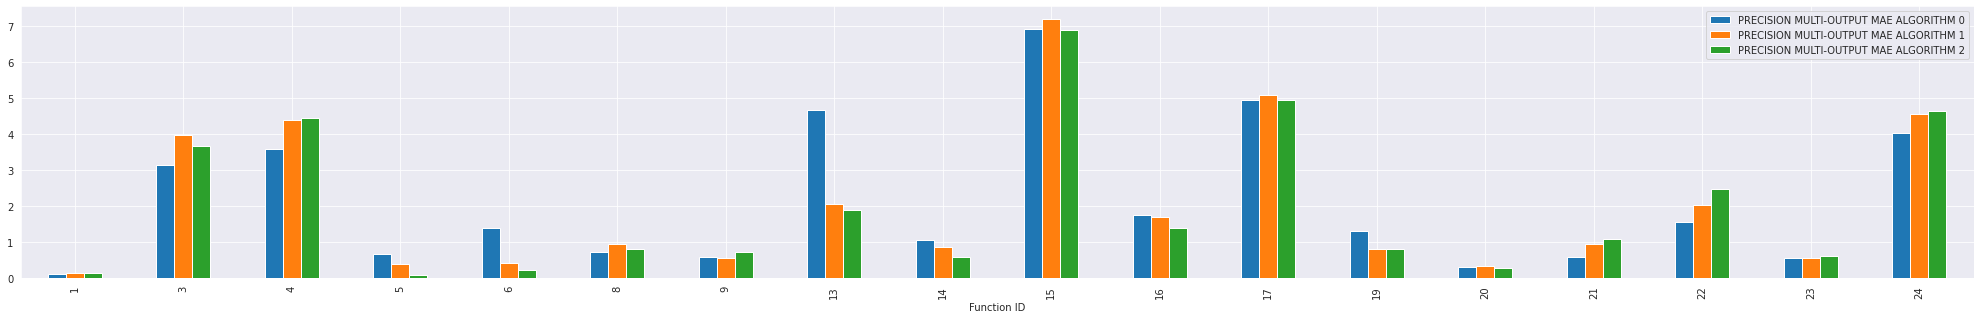

In [ ]:
merged_dfs_mae_under_10.plot(x="Function ID", y=["PRECISION MULTI-OUTPUT MAE ALGORITHM 0", "PRECISION MULTI-OUTPUT MAE ALGORITHM 1", "PRECISION MULTI-OUTPUT MAE ALGORITHM 2"], kind="bar", figsize=(35,5), width = 0.5)

In [ ]:
merged_dfs_mae['log PRECISION MULTI-OUTPUT MAE ALGORITHM 0'] = np.log(merged_dfs_mae['PRECISION MULTI-OUTPUT MAE ALGORITHM 0']+1)
merged_dfs_mae['log PRECISION MULTI-OUTPUT MAE ALGORITHM 1'] = np.log(merged_dfs_mae['PRECISION MULTI-OUTPUT MAE ALGORITHM 1']+1)
merged_dfs_mae['log PRECISION MULTI-OUTPUT MAE ALGORITHM 2'] = np.log(merged_dfs_mae['PRECISION MULTI-OUTPUT MAE ALGORITHM 2']+1)

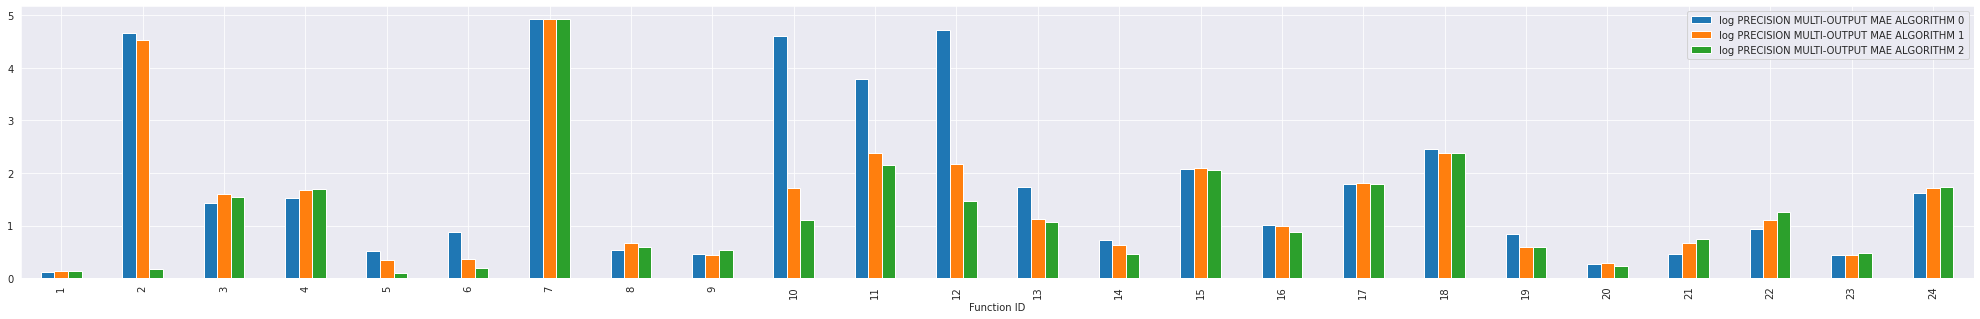

In [ ]:
merged_dfs_mae.plot(x="Function ID", y=["log PRECISION MULTI-OUTPUT MAE ALGORITHM 0", "log PRECISION MULTI-OUTPUT MAE ALGORITHM 1", "log PRECISION MULTI-OUTPUT MAE ALGORITHM 2"], kind="bar", figsize=(35,5), width = 0.5)

#### Multi vs Single 

##### Alg 0

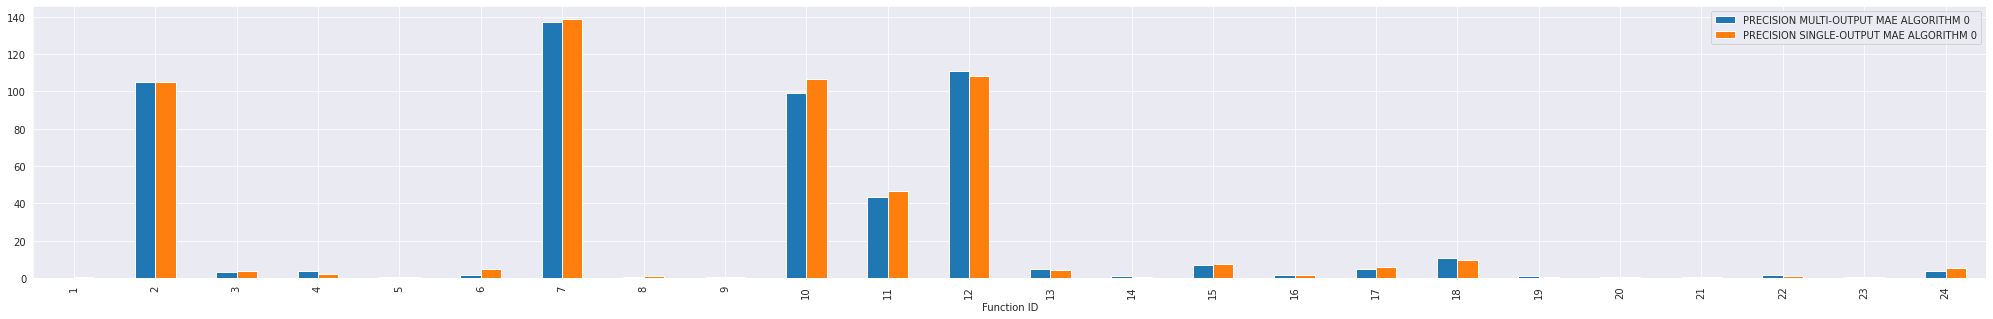

In [ ]:
single_multi_mae_fid_0.plot(x="Function ID", y=["PRECISION MULTI-OUTPUT MAE ALGORITHM 0", "PRECISION SINGLE-OUTPUT MAE ALGORITHM 0"], kind="bar", figsize=(35,5), width = 0.5)

In [ ]:
single_multi_mae_fid_0['log PRECISION MULTI-OUTPUT MAE ALGORITHM 0'] = np.log(single_multi_mae_fid_0['PRECISION MULTI-OUTPUT MAE ALGORITHM 0']+1)
single_multi_mae_fid_0['log PRECISION SINGLE-OUTPUT MAE ALGORITHM 0'] = np.log(single_multi_mae_fid_0['PRECISION SINGLE-OUTPUT MAE ALGORITHM 0']+1)

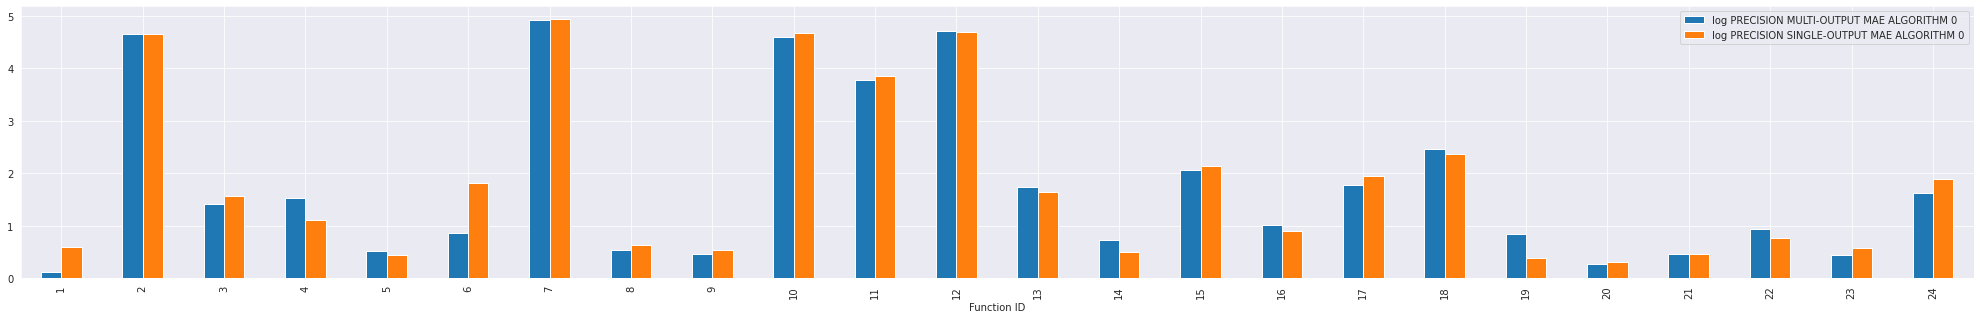

In [ ]:
single_multi_mae_fid_0.plot(x="Function ID", y=["log PRECISION MULTI-OUTPUT MAE ALGORITHM 0", "log PRECISION SINGLE-OUTPUT MAE ALGORITHM 0"], kind="bar", figsize=(35,5), width = 0.5)

##### Alg 1

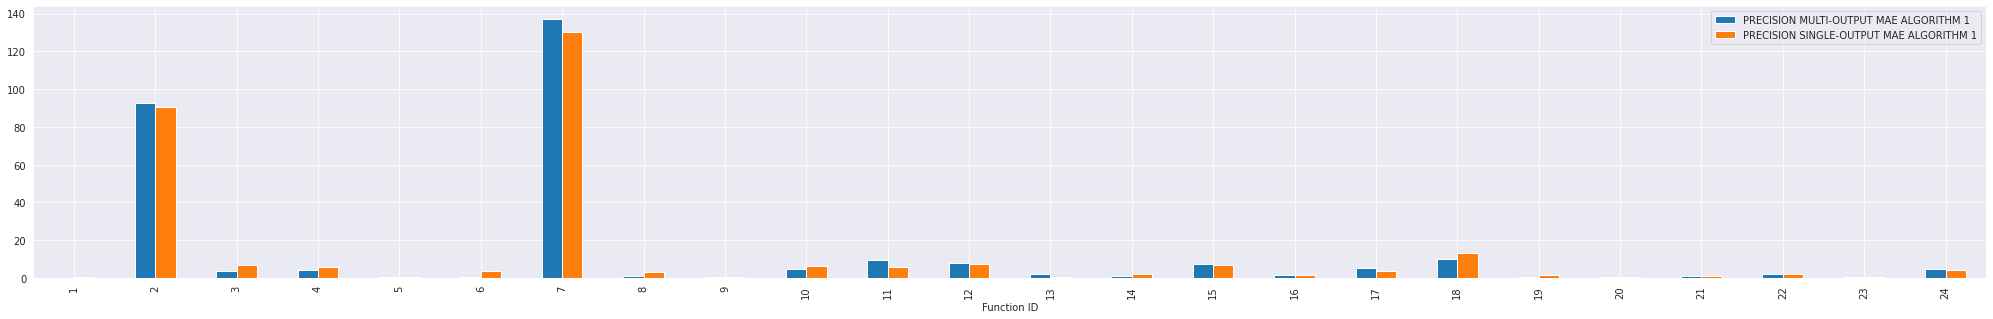

In [ ]:
single_multi_mae_fid_1.plot(x="Function ID", y=["PRECISION MULTI-OUTPUT MAE ALGORITHM 1", "PRECISION SINGLE-OUTPUT MAE ALGORITHM 1"], kind="bar", figsize=(35,5), width = 0.5)

In [ ]:
single_multi_mae_fid_1['log PRECISION MULTI-OUTPUT MAE ALGORITHM 1'] = np.log(single_multi_mae_fid_1['PRECISION MULTI-OUTPUT MAE ALGORITHM 1']+1)
single_multi_mae_fid_1['log PRECISION SINGLE-OUTPUT MAE ALGORITHM 1'] = np.log(single_multi_mae_fid_1['PRECISION SINGLE-OUTPUT MAE ALGORITHM 1']+1)

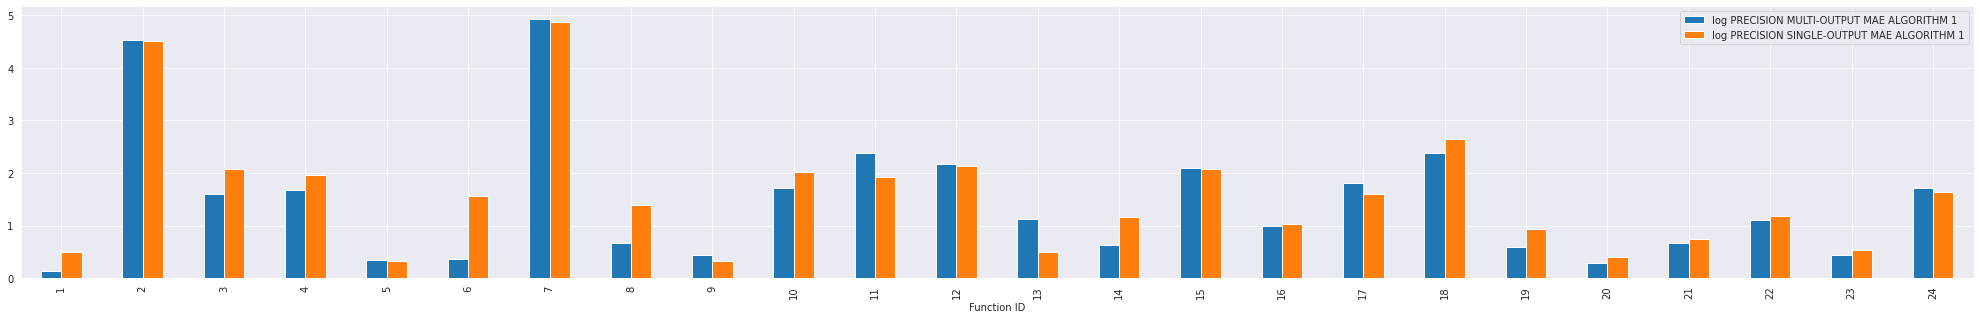

In [ ]:
single_multi_mae_fid_1.plot(x="Function ID", y=["log PRECISION MULTI-OUTPUT MAE ALGORITHM 1", "log PRECISION SINGLE-OUTPUT MAE ALGORITHM 1"], kind="bar", figsize=(35,5), width = 0.5)

##### Alg 2

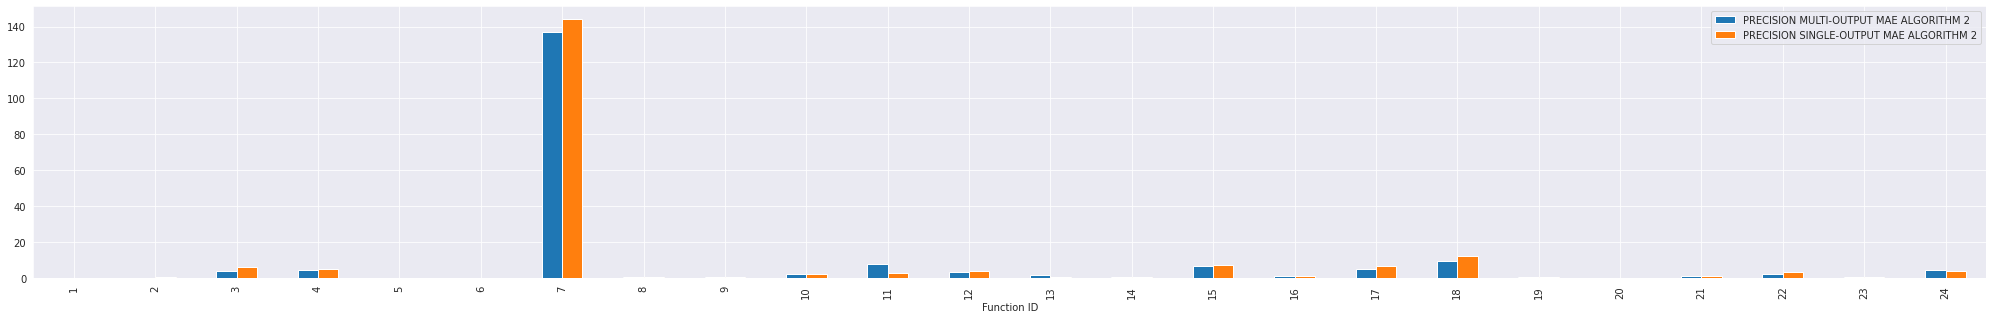

In [ ]:
single_multi_mae_fid_2.plot(x="Function ID", y=["PRECISION MULTI-OUTPUT MAE ALGORITHM 2", "PRECISION SINGLE-OUTPUT MAE ALGORITHM 2"], kind="bar", figsize=(35,5), width = 0.5)

In [ ]:
single_multi_mae_fid_2['log PRECISION MULTI-OUTPUT MAE ALGORITHM 2'] = np.log(single_multi_mae_fid_2['PRECISION MULTI-OUTPUT MAE ALGORITHM 2']+1)
single_multi_mae_fid_2['log PRECISION SINGLE-OUTPUT MAE ALGORITHM 2'] = np.log(single_multi_mae_fid_2['PRECISION SINGLE-OUTPUT MAE ALGORITHM 2']+1)

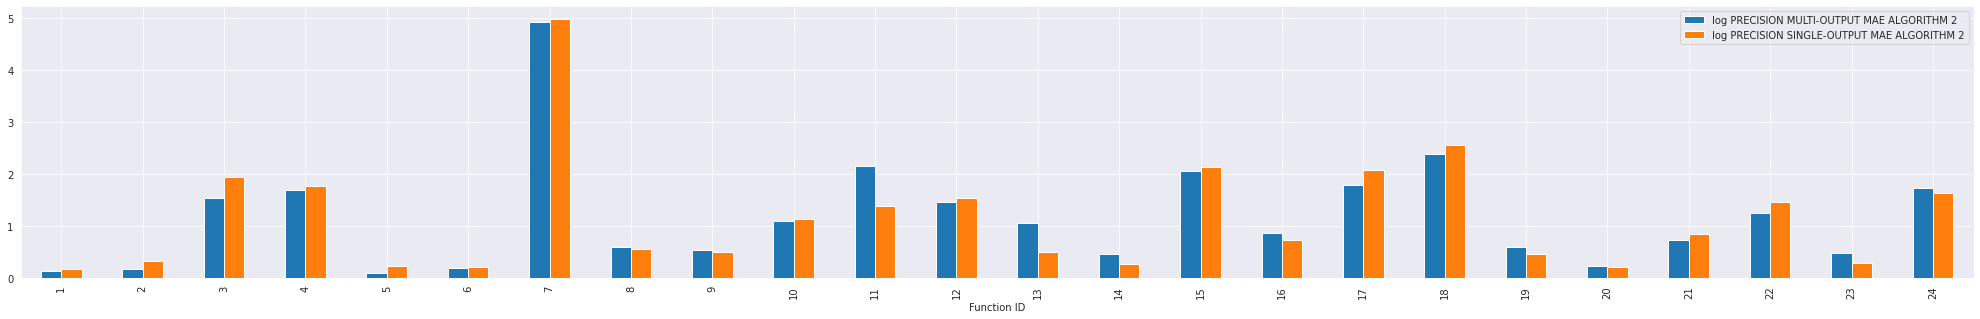

In [ ]:
single_multi_mae_fid_2.plot(x="Function ID", y=["log PRECISION MULTI-OUTPUT MAE ALGORITHM 2", "log PRECISION SINGLE-OUTPUT MAE ALGORITHM 2"], kind="bar", figsize=(35,5), width = 0.5)

## Precision Multi Target

### Algorithm 0

In [ ]:
single_multi_precision_df_melted = single_multi_merge_0_melted

In [ ]:
single_multi_precision_df_melted.replace("f_id_y", 'Function ID', inplace=True)

In [ ]:
single_multi_precision_df_melted['value_log'] = np.log(single_multi_precision_df_melted['value']+1)

In [ ]:
single_multi_precision_df_melted.columns = ['Function ID', 'variable', 'Precision', 'Log Scaled Precision']

In [ ]:
alt.Chart(
    single_multi_precision_df_melted
).mark_circle(
).encode(
    alt.X('variable:N', title=''),
    alt.Y('Log Scaled Precision:Q'),
    column='Function ID:N',
    color='variable:N'
).properties(
    width = 100,
    height = 400
)

alt.Chart(...)

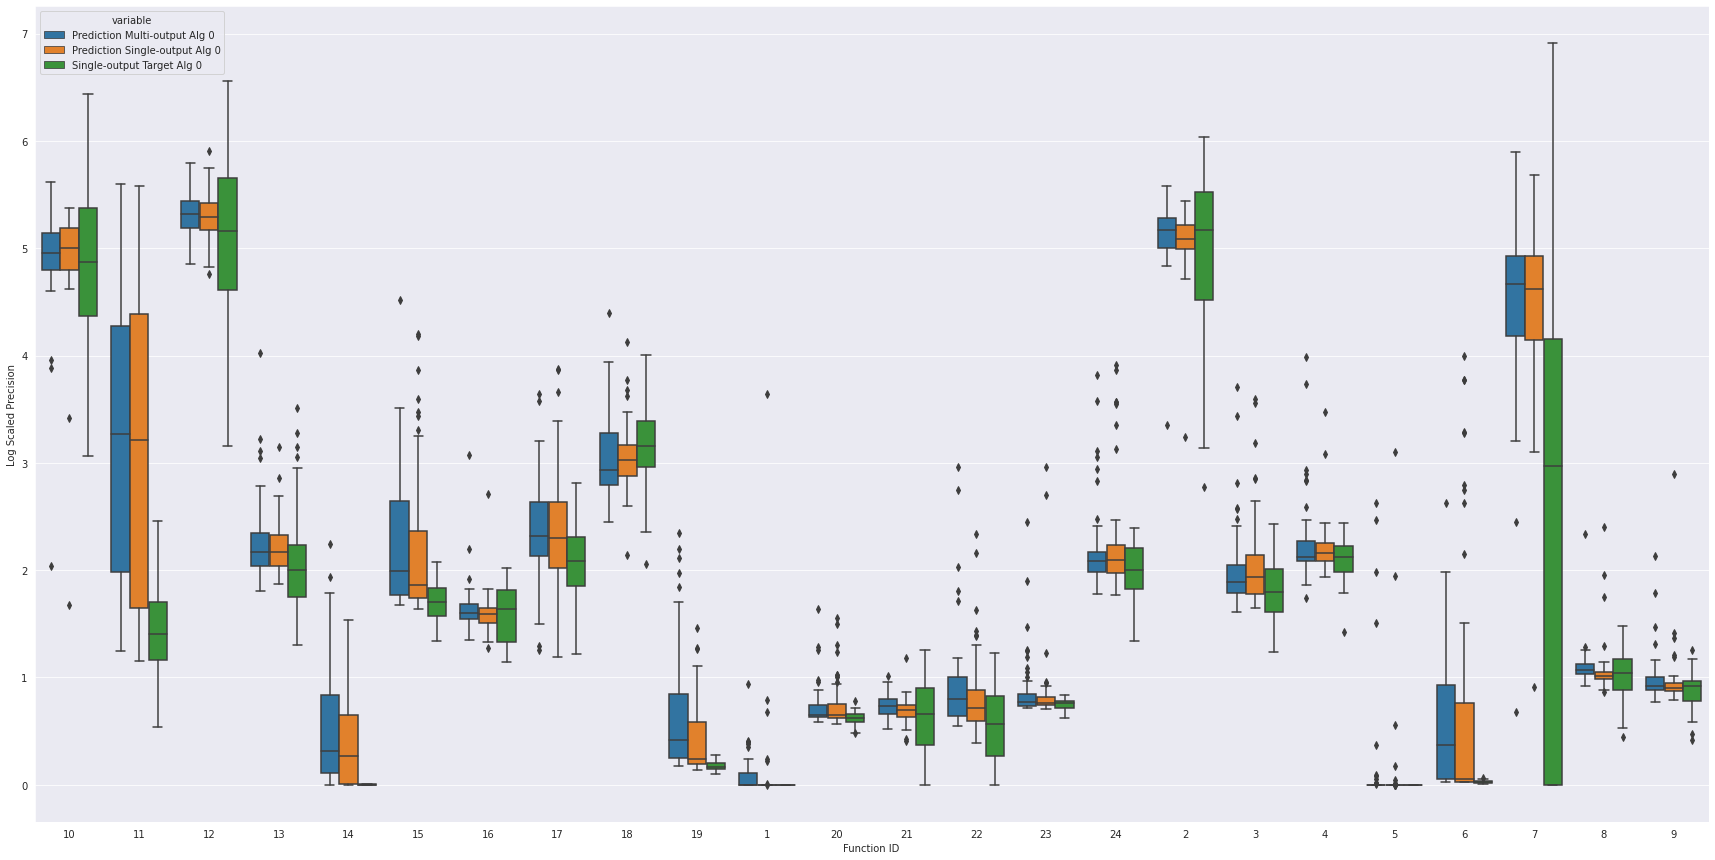

In [ ]:
a4_dims = (30, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Log Scaled Precision', hue='variable', data=single_multi_precision_df_melted)

#### Precision for a given function

In [ ]:
f_id = '4'

In [ ]:
single_multi_precision_df_f_id_1 = single_multi_merge_0.loc[single_multi_merge_0['f_id_y'] == f_id][['Prediction Multi-output Alg 0', 'Prediction Single-output Alg 0', 'Single-output Target Alg 0']]

In [ ]:
single_multi_precision_df_f_id_1['f_id'] = single_multi_merge_0['f_id_y']

In [ ]:
single_multi_precision_df_f_id_1_melted = pd.melt(single_multi_precision_df_f_id_1, id_vars=['f_id'], value_vars=['Prediction Multi-output Alg 0', 'Prediction Single-output Alg 0', 'Single-output Target Alg 0'])

In [ ]:
single_multi_precision_df_f_id_1_melted['value_log'] = np.log(single_multi_precision_df_f_id_1_melted['value'])

In [ ]:
single_multi_precision_df_f_id_1_melted.columns = ['Function ID', 'variable', 'Precision', 'Precision Log Scale']

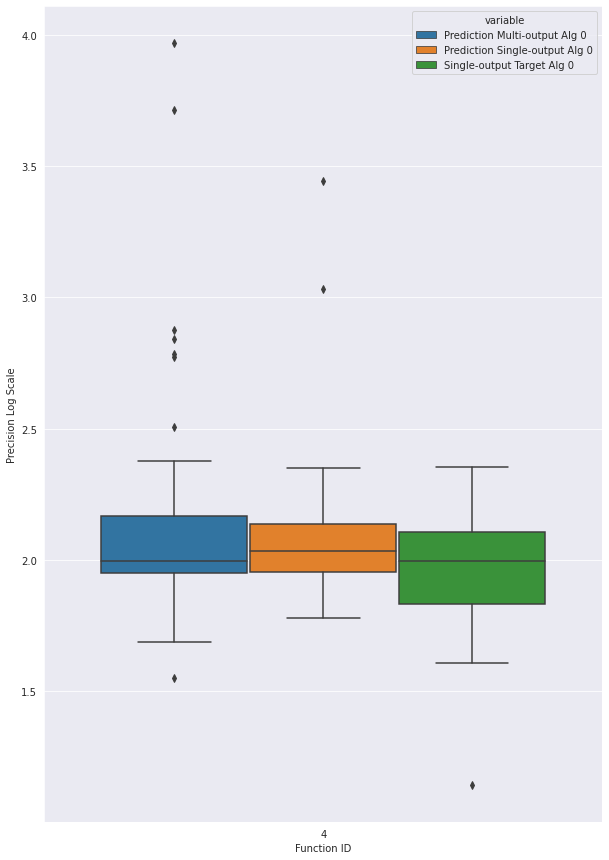

In [ ]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Precision Log Scale', hue='variable', data=single_multi_precision_df_f_id_1_melted)

In [ ]:
alt.Chart(single_multi_precision_df_f_id_1_melted).mark_circle().encode(
    x='variable:O',
    y='Precision Log Scale:Q',
    color = 'variable'
).properties(
    width = 200,
    height = 400
)

alt.Chart(...)

#### Precision for a given function

In [ ]:
f_id = '13'

In [ ]:
single_multi_precision_df_f_id_1 = single_multi_merge_0.loc[single_multi_merge_0['f_id_y'] == f_id][['Prediction Multi-output Alg 0', 'Prediction Single-output Alg 0', 'Single-output Target Alg 0']]

In [ ]:
single_multi_precision_df_f_id_1['f_id'] = single_multi_merge_0['f_id_y']

In [ ]:
single_multi_precision_df_f_id_1_melted = pd.melt(single_multi_precision_df_f_id_1, id_vars=['f_id'], value_vars=['Prediction Multi-output Alg 0', 'Prediction Single-output Alg 0', 'Single-output Target Alg 0'])

In [ ]:
single_multi_precision_df_f_id_1_melted['value_log'] = np.log(single_multi_precision_df_f_id_1_melted['value']+1)

In [ ]:
single_multi_precision_df_f_id_1_melted.columns = ['Function ID', 'variable', 'Precision', 'Precision Log Scale']

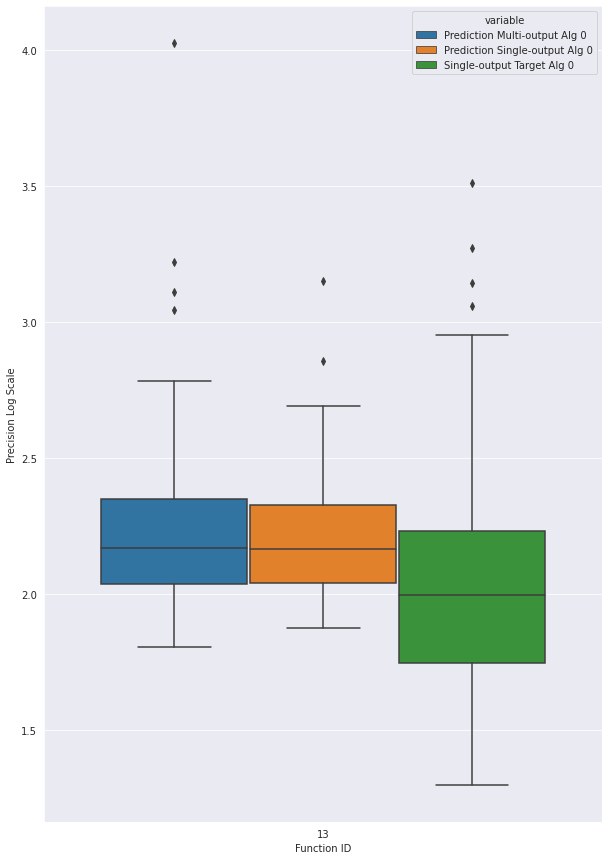

In [ ]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Precision Log Scale', hue='variable', data=single_multi_precision_df_f_id_1_melted)

In [ ]:
alt.Chart(single_multi_precision_df_f_id_1_melted).mark_circle().encode(
    x='variable:O',
    y='Precision Log Scale:Q',
    color = 'variable'
).properties(
    width = 200,
    height = 400
)

alt.Chart(...)

### Algorithm 1


In [ ]:
single_multi_precision_df_melted = single_multi_merge_1_melted

In [ ]:
single_multi_precision_df_melted.replace("f_id_y", 'Function ID', inplace=True)

In [ ]:
single_multi_precision_df_melted['value_log'] = np.log(single_multi_precision_df_melted['value']+1)

In [ ]:
single_multi_precision_df_melted.columns = ['Function ID', 'variable', 'Precision', 'Log Scaled Precision']

In [ ]:
alt.Chart(
    single_multi_precision_df_melted
).mark_circle(
).encode(
    alt.X('variable:N', title=''),
    alt.Y('Log Scaled Precision:Q'),
    column='Function ID:N',
    color='variable:N'
).properties(
    width = 100,
    height = 400
)

alt.Chart(...)

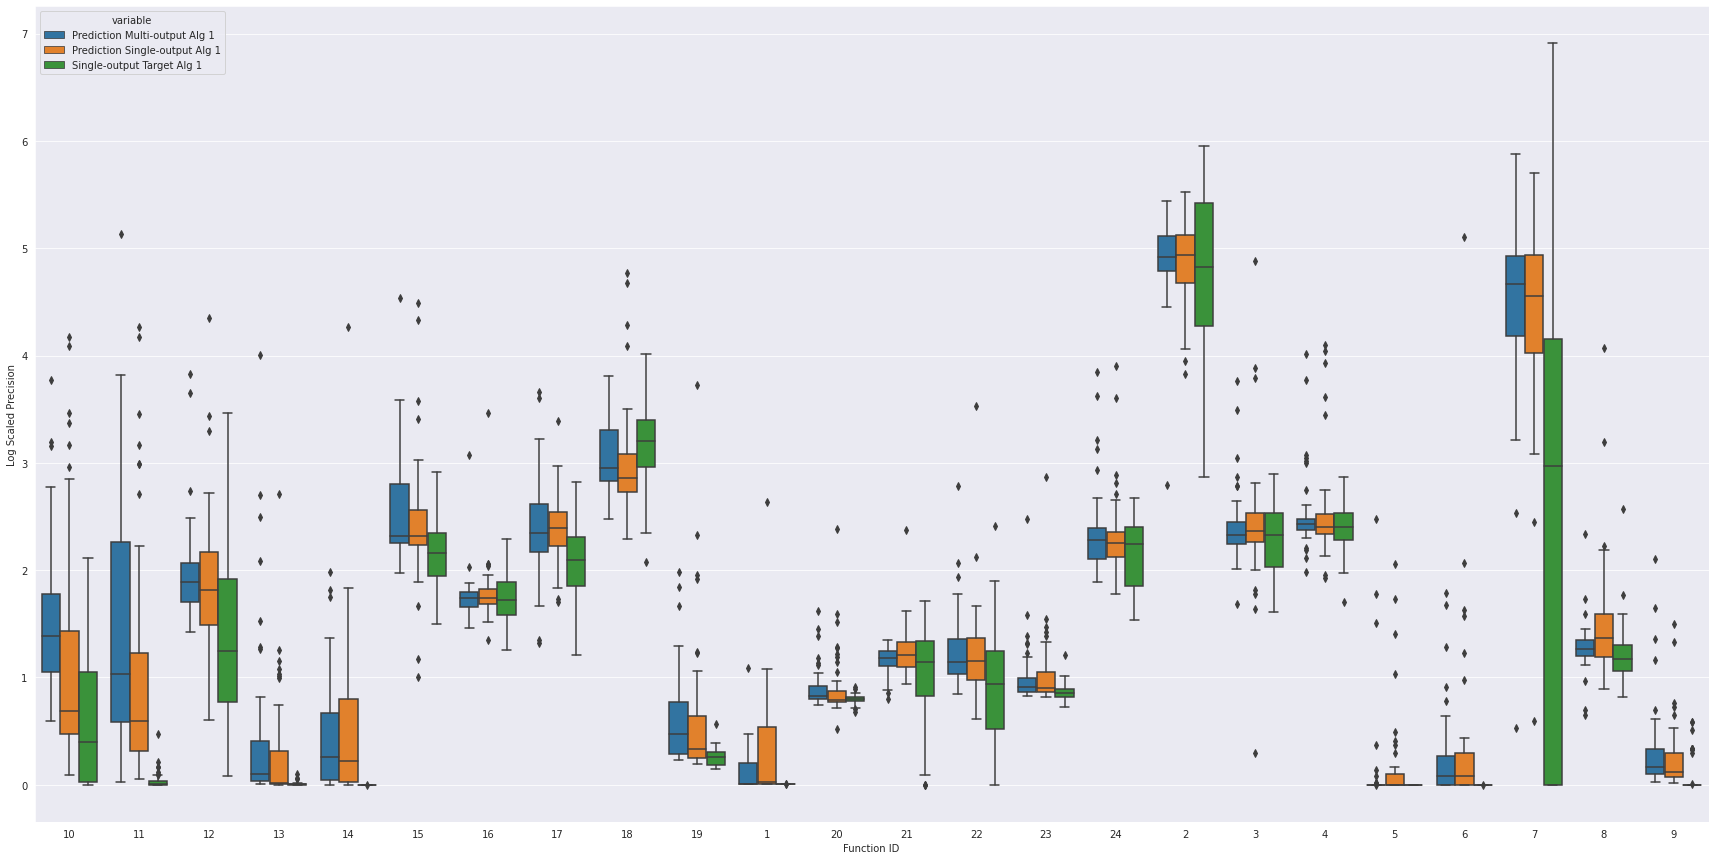

In [ ]:
a4_dims = (30, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Log Scaled Precision', hue='variable', data=single_multi_precision_df_melted)

#### Precision for a given function

In [ ]:
f_id = '4'

In [ ]:
single_multi_precision_df_f_id_1 = single_multi_merge_1.loc[single_multi_merge_1['f_id_y'] == f_id][['Prediction Multi-output Alg 1', 'Prediction Single-output Alg 1', 'Single-output Target Alg 1']]

In [ ]:
single_multi_precision_df_f_id_1['f_id'] = single_multi_merge_0['f_id_y']

In [ ]:
single_multi_precision_df_f_id_1_melted = pd.melt(single_multi_precision_df_f_id_1, id_vars=['f_id'], value_vars=['Prediction Multi-output Alg 1', 'Prediction Single-output Alg 1', 'Single-output Target Alg 1'])

In [ ]:
single_multi_precision_df_f_id_1_melted['value_log'] = np.log(single_multi_precision_df_f_id_1_melted['value']+1)

In [ ]:
single_multi_precision_df_f_id_1_melted.columns = ['Function ID', 'variable', 'Precision', 'Precision Log Scale']

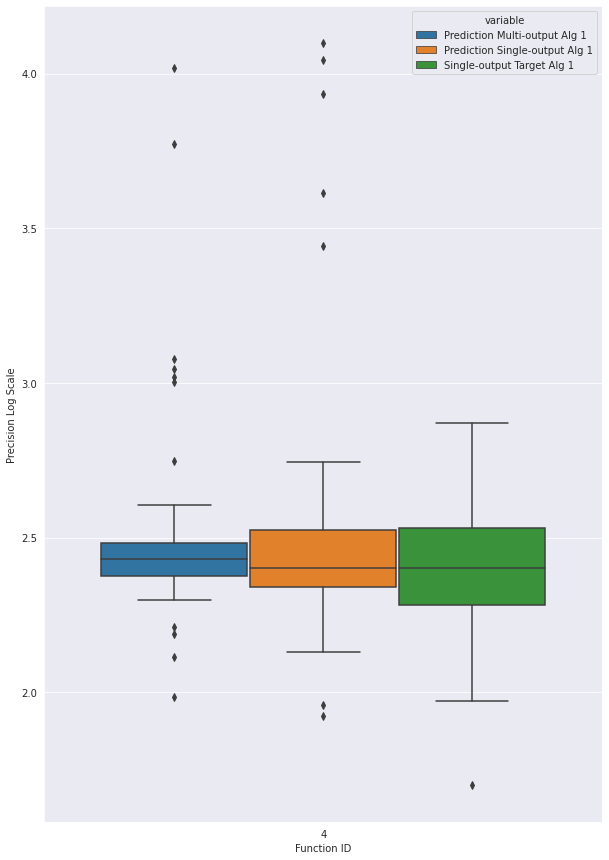

In [ ]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Precision Log Scale', hue='variable', data=single_multi_precision_df_f_id_1_melted)

In [ ]:
alt.Chart(single_multi_precision_df_f_id_1_melted).mark_circle().encode(
    x='variable:O',
    y='Precision Log Scale:Q',
    color = 'variable'
).properties(
    width = 200,
    height = 400
)

alt.Chart(...)

#### Precision for a given function

In [ ]:
f_id = '13'

In [ ]:
single_multi_precision_df_f_id_1 = single_multi_merge_1.loc[single_multi_merge_1['f_id_y'] == f_id][['Prediction Multi-output Alg 1', 'Prediction Single-output Alg 1', 'Single-output Target Alg 1']]

In [ ]:
single_multi_precision_df_f_id_1['f_id'] = single_multi_merge_0['f_id_y']

In [ ]:
single_multi_precision_df_f_id_1_melted = pd.melt(single_multi_precision_df_f_id_1, id_vars=['f_id'], value_vars=['Prediction Multi-output Alg 1', 'Prediction Single-output Alg 1', 'Single-output Target Alg 1'])

In [ ]:
single_multi_precision_df_f_id_1_melted['value_log'] = np.log(single_multi_precision_df_f_id_1_melted['value'])

In [ ]:
single_multi_precision_df_f_id_1_melted.columns = ['Function ID', 'variable', 'Precision', 'Precision Log Scale']

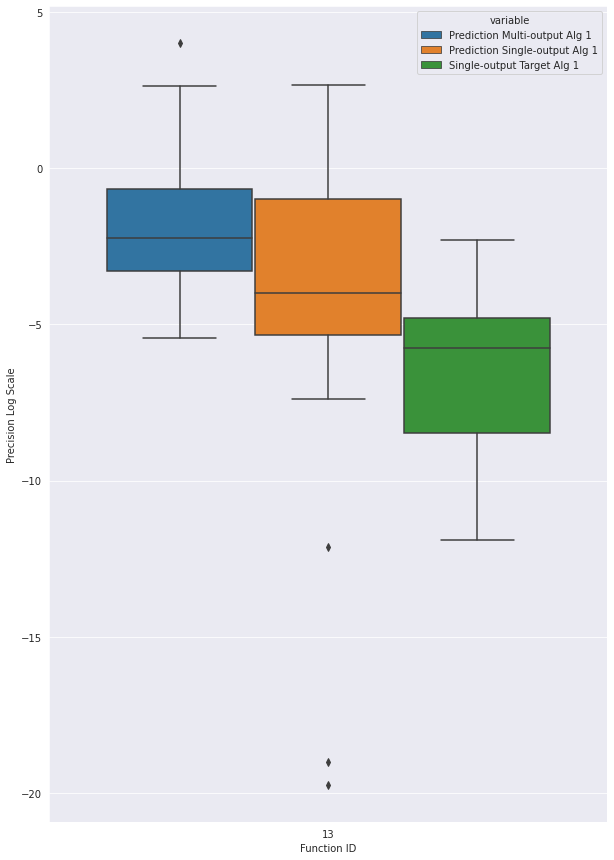

In [ ]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Precision Log Scale', hue='variable', data=single_multi_precision_df_f_id_1_melted)

In [ ]:
alt.Chart(single_multi_precision_df_f_id_1_melted).mark_circle().encode(
    x='variable:O',
    y='Precision Log Scale:Q',
    color = 'variable'
).properties(
    width = 200,
    height = 400
)

alt.Chart(...)

### Algorithm 2

In [ ]:
single_multi_precision_df_melted = single_multi_merge_2_melted

In [ ]:
single_multi_precision_df_melted.replace("f_id_y", 'Function ID', inplace=True)

In [ ]:
single_multi_precision_df_melted['value_log'] = np.log(single_multi_precision_df_melted['value']+1)

In [ ]:
single_multi_precision_df_melted.columns = ['Function ID', 'variable', 'Precision', 'Log Scaled Precision']

In [ ]:
alt.Chart(
    single_multi_precision_df_melted
).mark_circle(
).encode(
    alt.X('variable:N', title=''),
    alt.Y('Log Scaled Precision:Q'),
    column='Function ID:N',
    color='variable:N'
).properties(
    width = 100,
    height = 400
)

alt.Chart(...)

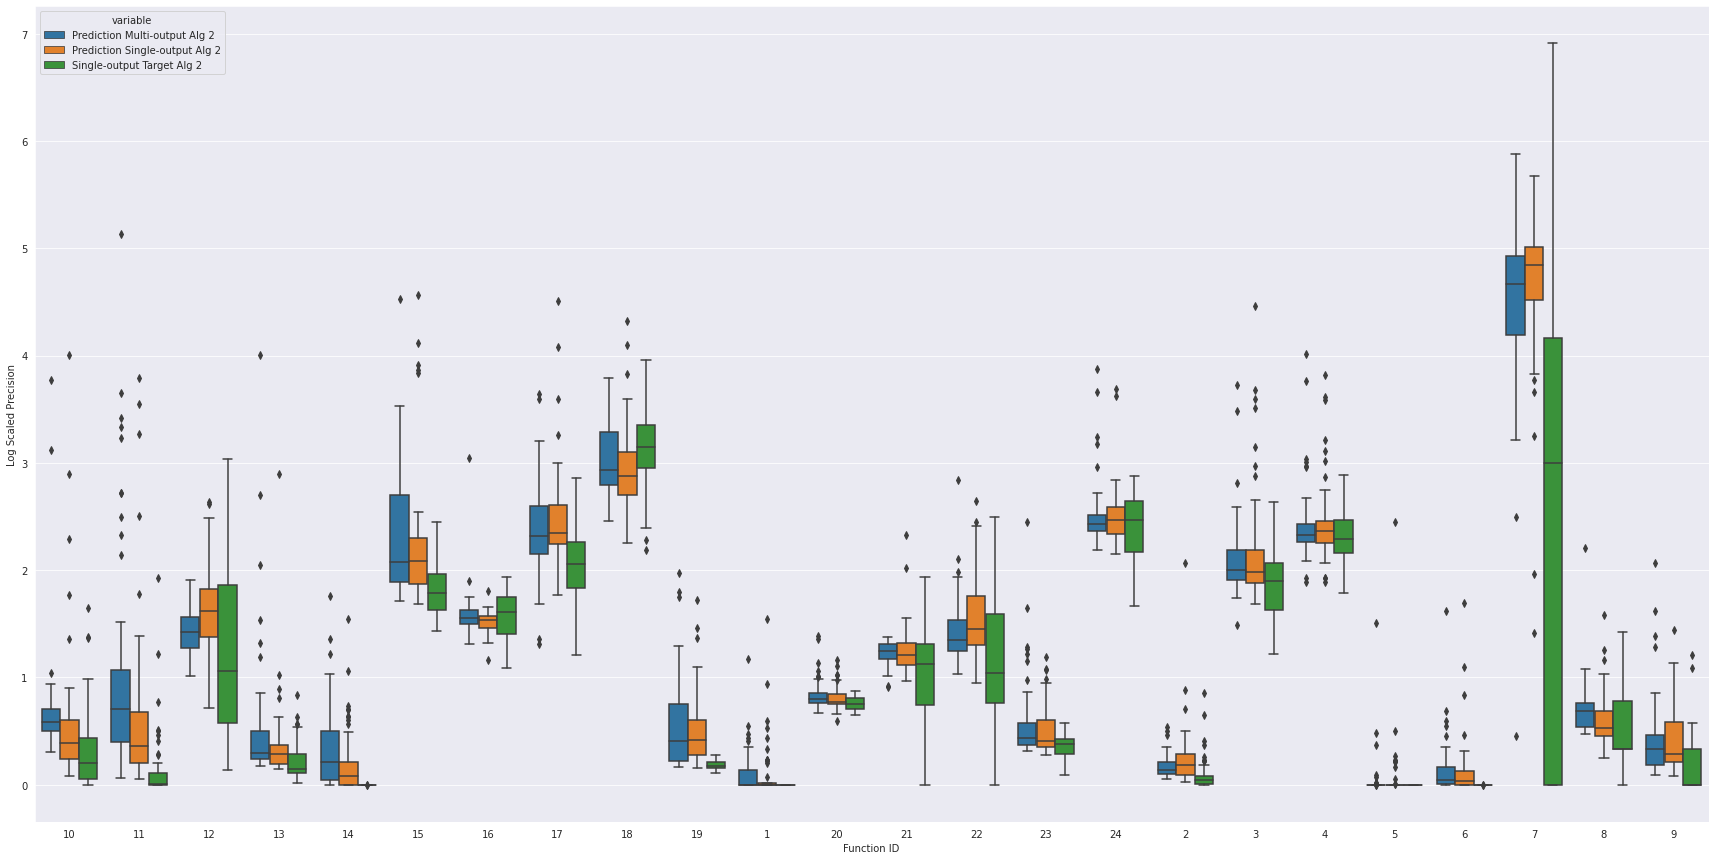

In [ ]:
a4_dims = (30, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Log Scaled Precision', hue='variable', data=single_multi_precision_df_melted)

#### Precision for a given function

In [ ]:
f_id = '4'

In [ ]:
single_multi_precision_df_f_id_1 = single_multi_merge_2.loc[single_multi_merge_2['f_id_y'] == f_id][['Prediction Multi-output Alg 2', 'Prediction Single-output Alg 2', 'Single-output Target Alg 2']]

In [ ]:
single_multi_precision_df_f_id_1['f_id'] = single_multi_merge_0['f_id_y']

In [ ]:
single_multi_precision_df_f_id_1_melted = pd.melt(single_multi_precision_df_f_id_1, id_vars=['f_id'], value_vars=['Prediction Multi-output Alg 2', 'Prediction Single-output Alg 2', 'Single-output Target Alg 2'])

In [ ]:
single_multi_precision_df_f_id_1_melted['value_log'] = np.log(single_multi_precision_df_f_id_1_melted['value'])

In [ ]:
single_multi_precision_df_f_id_1_melted.columns = ['Function ID', 'variable', 'Precision', 'Precision Log Scale']

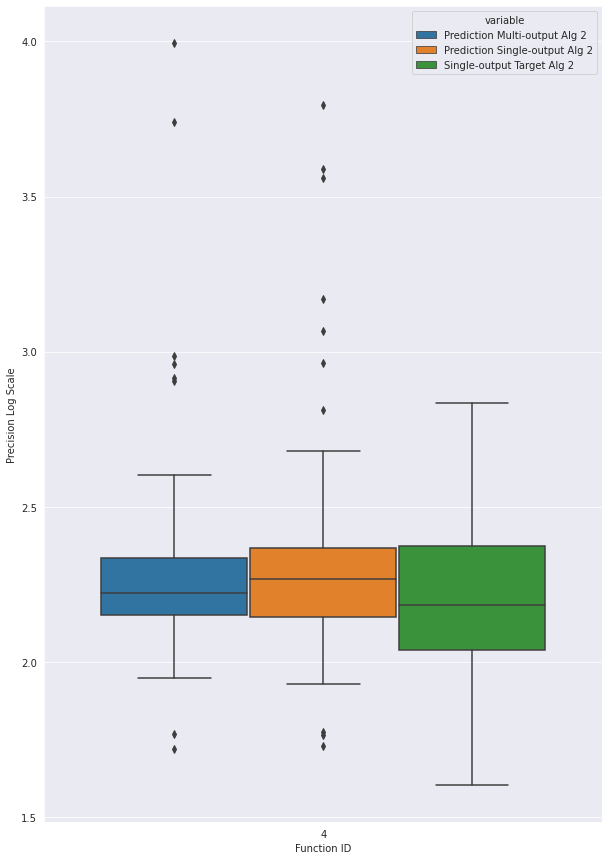

In [ ]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Precision Log Scale', hue='variable', data=single_multi_precision_df_f_id_1_melted)

In [ ]:
alt.Chart(single_multi_precision_df_f_id_1_melted).mark_circle().encode(
    x='variable:O',
    y='Precision Log Scale:Q',
    color = 'variable'
).properties(
    width = 200,
    height = 400
)

alt.Chart(...)

#### Precision for a given function

In [ ]:
f_id = '13'

In [ ]:
single_multi_precision_df_f_id_1 = single_multi_merge_2.loc[single_multi_merge_2['f_id_y'] == f_id][['Prediction Multi-output Alg 2', 'Prediction Single-output Alg 2', 'Single-output Target Alg 2']]

In [ ]:
single_multi_precision_df_f_id_1['f_id'] = single_multi_merge_0['f_id_y']

In [ ]:
single_multi_precision_df_f_id_1_melted = pd.melt(single_multi_precision_df_f_id_1, id_vars=['f_id'], value_vars=['Prediction Multi-output Alg 2', 'Prediction Single-output Alg 2', 'Single-output Target Alg 2'])

In [ ]:
single_multi_precision_df_f_id_1_melted['value_log'] = np.log(single_multi_precision_df_f_id_1_melted['value'])

In [ ]:
single_multi_precision_df_f_id_1_melted.columns = ['Function ID', 'variable', 'Precision', 'Precision Log Scale']

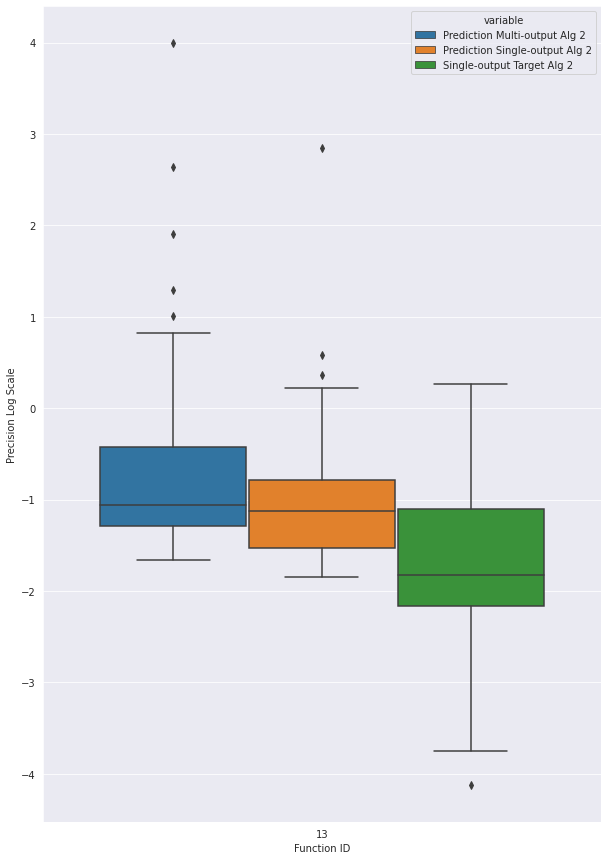

In [ ]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x='Function ID', y='Precision Log Scale', hue='variable', data=single_multi_precision_df_f_id_1_melted)

In [ ]:
alt.Chart(single_multi_precision_df_f_id_1_melted).mark_circle().encode(
    x='variable:O',
    y='Precision Log Scale:Q',
    color = 'variable'
).properties(
    width = 200,
    height = 400
)

alt.Chart(...)

# Export

## Shap to CSV

### Multi Model

In [ ]:
for i in range(50):
  filename = f"{models_folder}{multi_target_folder}{regression_multi}model_fold_no_{i}_alg_no_0_1_2.pkl"
  model_multi = pickle.load(open(filename, 'rb'))

  f_id_dict, asd = get_dictonary_function_id_with_index(model_multi.X_train)

  explainer = shap.TreeExplainer(model = model_multi.model)

  shap_values = explainer.shap_values(X = model_multi.X_train)

  file_name_alg_0_alg_level = shap_algorithm_level_folder_multi_alg_0 + f'alg_0_shaps_fold_no_{i}.csv'
  file_name_alg_1_alg_level = shap_algorithm_level_folder_multi_alg_1 + f'alg_1_shaps_fold_no_{i}.csv'
  file_name_alg_2_alg_level = shap_algorithm_level_folder_multi_alg_2 + f'alg_2_shaps_fold_no_{i}.csv'

  alg_0_shaps_alg_level = pd.DataFrame(shap_values[0], columns=model_multi.X_train.columns)
  alg_1_shaps_alg_level = pd.DataFrame(shap_values[1], columns=model_multi.X_train.columns)
  alg_2_shaps_alg_level = pd.DataFrame(shap_values[2], columns=model_multi.X_train.columns)

  alg_0_shaps_alg_level.to_csv(file_name_alg_0_alg_level, index=False)
  alg_1_shaps_alg_level.to_csv(file_name_alg_1_alg_level, index=False)
  alg_2_shaps_alg_level.to_csv(file_name_alg_2_alg_level, index=False)

  f_id_shap_values = []
  for f_id, indexes in f_id_dict.items():
    file_name_alg_0 = shap_function_level_folder_multi_alg_0 + f'function_{f_id}_alg_0_shaps_fold_no_{i}.csv'
    file_name_alg_1 = shap_function_level_folder_multi_alg_1 + f'function_{f_id}_alg_1_shaps_fold_no_{i}.csv'
    file_name_alg_2 = shap_function_level_folder_multi_alg_2 + f'function_{f_id}_alg_2_shaps_fold_no_{i}.csv'

    shap_values = explainer.shap_values(X = model_multi.X_train.iloc[f_id_dict.get(str(f_id)), :])

    alg_0_shaps = pd.DataFrame(shap_values[0], columns=model_multi.X_train.columns)
    alg_1_shaps = pd.DataFrame(shap_values[1], columns=model_multi.X_train.columns)
    alg_2_shaps = pd.DataFrame(shap_values[2], columns=model_multi.X_train.columns)

    alg_0_shaps.to_csv(file_name_alg_0, index=False)
    alg_1_shaps.to_csv(file_name_alg_1, index=False)
    alg_2_shaps.to_csv(file_name_alg_2, index=False)


### Single Model

In [ ]:
alg = 0
for i in range(50):
  filename = f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{i}_alg_no_0_1_2_label_Precision_alg{alg}.pkl"
  model_single = pickle.load(open(filename, 'rb'))

  f_id_dict, asd = get_dictonary_function_id_with_index(model_single.X_train)

  explainer = shap.TreeExplainer(model = model_single.model)

  shap_values = explainer.shap_values(X = model_single.X_train)

  file_name_alg_level = shap_algorithm_level_folder_single_alg_0 + f'alg_{alg}_shaps_fold_no_{i}.csv'

  shaps_alg_level = pd.DataFrame(shap_values, columns=model_single.X_train.columns)

  shaps_alg_level.to_csv(file_name_alg_level, index=False)

  f_id_shap_values = []
  for f_id, indexes in f_id_dict.items():
    file_name = shap_function_level_folder_single_alg_0 + f'function_{f_id}_alg_{alg}_shaps_fold_no_{i}.csv'

    shap_values = explainer.shap_values(X = model_single.X_train.iloc[f_id_dict.get(str(f_id)), :])

    alg_0_shaps = pd.DataFrame(shap_values, columns=model_single.X_train.columns)

    alg_0_shaps.to_csv(file_name, index=False)


In [ ]:
alg = 1
for i in range(50):
  filename = f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{i}_alg_no_0_1_2_label_Precision_alg{alg}.pkl"
  model_single = pickle.load(open(filename, 'rb'))

  f_id_dict, asd = get_dictonary_function_id_with_index(model_single.X_train)

  explainer = shap.TreeExplainer(model = model_single.model)

  shap_values = explainer.shap_values(X = model_single.X_train)

  file_name_alg_level = shap_algorithm_level_folder_single_alg_1 + f'alg_{alg}_shaps_fold_no_{i}.csv'

  shaps_alg_level = pd.DataFrame(shap_values, columns=model_single.X_train.columns)

  shaps_alg_level.to_csv(file_name_alg_level, index=False)

  f_id_shap_values = []
  for f_id, indexes in f_id_dict.items():
    file_name = shap_function_level_folder_single_alg_1 + f'function_{f_id}_alg_{alg}_shaps_fold_no_{i}.csv'

    shap_values = explainer.shap_values(X = model_single.X_train.iloc[f_id_dict.get(str(f_id)), :])

    alg_0_shaps = pd.DataFrame(shap_values, columns=model_single.X_train.columns)

    alg_0_shaps.to_csv(file_name, index=False)


In [ ]:
alg = 2
for i in range(50):
  filename = f"{models_folder}{single_output_folder}{regression_single}model_fold_no_{i}_alg_no_0_1_2_label_Precision_alg{alg}.pkl"
  model_single = pickle.load(open(filename, 'rb'))

  f_id_dict, asd = get_dictonary_function_id_with_index(model_single.X_train)

  explainer = shap.TreeExplainer(model = model_single.model)

  shap_values = explainer.shap_values(X = model_single.X_train)

  file_name_alg_level = shap_algorithm_level_folder_single_alg_2 + f'alg_{alg}_shaps_fold_no_{i}.csv'

  shaps_alg_level = pd.DataFrame(shap_values, columns=model_single.X_train.columns)

  shaps_alg_level.to_csv(file_name_alg_level, index=False)

  f_id_shap_values = []
  for f_id, indexes in f_id_dict.items():
    file_name = shap_function_level_folder_single_alg_2 + f'function_{f_id}_alg_{alg}_shaps_fold_no_{i}.csv'

    shap_values = explainer.shap_values(X = model_single.X_train.iloc[f_id_dict.get(str(f_id)), :])

    alg_0_shaps = pd.DataFrame(shap_values, columns=model_single.X_train.columns)

    alg_0_shaps.to_csv(file_name, index=False)


## MAE to Csv

### Function Level

#### Multi

In [ ]:
merged_dfs_mae

Function ID  ...  PRECISION MULTI-OUTPUT MAE ALGORITHM 2
0             1  ...                                0.147532
1             2  ...                                0.196228
2             3  ...                                3.657198
3             4  ...                                4.442512
4             5  ...                                0.096344
5             6  ...                                0.222008
6             7  ...                              137.068444
7             8  ...                                0.802144
8             9  ...                                0.717886
9            10  ...                                2.005067
10           11  ...                                7.555264
11           12  ...                                3.299514
12           13  ...                                1.888585
13           14  ...                                0.574682
14           15  ...                                6.891243
15           16  ...                                1.397126
16           17  ...                                4.954182
17           18  ...                                9.765925
18           19  ...                                0.810601
19           20  ...                                0.266033
20           21  ...                                1.097769
21           22  ...                                2.485003
22           23  ...                                0.625497
23           24  ...                                4.649244

[24 rows x 4 columns]

In [ ]:
file_name_mae_alg_0_function_level = mae_funtion_level_folder_multi_alg_0 + f'mae_function_level.csv'
file_name_mae_alg_1_function_level = mae_funtion_level_folder_multi_alg_1 + f'mae_function_level.csv'
file_name_mae_alg_2_function_level = mae_funtion_level_folder_multi_alg_2 + f'mae_function_level.csv'

In [ ]:
mae_alg_0_function_level = merged_dfs_mae[['Function ID', 'PRECISION MULTI-OUTPUT MAE ALGORITHM 0']]
mae_alg_1_function_level = merged_dfs_mae[['Function ID', 'PRECISION MULTI-OUTPUT MAE ALGORITHM 1']]
mae_alg_2_function_level = merged_dfs_mae[['Function ID', 'PRECISION MULTI-OUTPUT MAE ALGORITHM 2']]

In [ ]:
mae_alg_0_function_level.to_csv(file_name_mae_alg_0_function_level)
mae_alg_1_function_level.to_csv(file_name_mae_alg_1_function_level)
mae_alg_2_function_level.to_csv(file_name_mae_alg_2_function_level)

#### Single

In [ ]:
file_name_mae_alg_0_function_level = mae_funtion_level_folder_single_alg_0 + f'mae_function_level.csv'
file_name_mae_alg_1_function_level = mae_funtion_level_folder_single_alg_1 + f'mae_function_level.csv'
file_name_mae_alg_2_function_level = mae_funtion_level_folder_single_alg_2 + f'mae_function_level.csv'

In [ ]:
mae_alg_0_function_level = merged_single_dfs_mae[['Function ID', 'PRECISION SINGLE-OUTPUT MAE ALGORITHM 0']]
mae_alg_1_function_level = merged_single_dfs_mae[['Function ID', 'PRECISION SINGLE-OUTPUT MAE ALGORITHM 1']]
mae_alg_2_function_level = merged_single_dfs_mae[['Function ID', 'PRECISION SINGLE-OUTPUT MAE ALGORITHM 2']]

In [ ]:
mae_alg_0_function_level.to_csv(file_name_mae_alg_0_function_level)
mae_alg_1_function_level.to_csv(file_name_mae_alg_1_function_level)
mae_alg_2_function_level.to_csv(file_name_mae_alg_2_function_level)

## Fold Level

In [ ]:
multi_mae = mae_merged_renamed[['Fold', 'Precision Multi-output MAE']]
single_mae = mae_merged_renamed[['Fold', 'Precision Single-output MAE']]

In [ ]:
fold_mae_0 = []
fold_mae_1 = []
fold_mae_2 = []

for i in range(50):
  mae_alg_0 = mean_absolute_error(test_multioutput_df[test_multioutput_df['Fold'] == i]['Precision_alg0_real'], test_multioutput_df[test_multioutput_df['Fold'] == i]['Precision_alg0_prediction'])
  mae_alg_1 = mean_absolute_error(test_multioutput_df[test_multioutput_df['Fold'] == i]['Precision_alg1_real'], test_multioutput_df[test_multioutput_df['Fold'] == i]['Precision_alg1_prediction'])
  mae_alg_2 = mean_absolute_error(test_multioutput_df[test_multioutput_df['Fold'] == i]['Precision_alg2_real'], test_multioutput_df[test_multioutput_df['Fold'] == i]['Precision_alg2_prediction'])
  
  fold_mae_0.append([str(i), mae_alg_0])
  fold_mae_1.append([str(i), mae_alg_1])
  fold_mae_2.append([str(i), mae_alg_2])


fold_mae_0 = pd.DataFrame(fold_mae_0, columns=['Fold', 'MAE'])
fold_mae_1 = pd.DataFrame(fold_mae_1, columns=['Fold', 'MAE'])
fold_mae_2 = pd.DataFrame(fold_mae_2, columns=['Fold', 'MAE'])

In [ ]:
file_name_mae_alg_0 = mae_algorithm_level_folder_multi_alg_0 + f'mae_fold_level.csv'
file_name_mae_alg_1 = mae_algorithm_level_folder_multi_alg_1 + f'mae_fold_level.csv'
file_name_mae_alg_2 = mae_algorithm_level_folder_multi_alg_2 + f'mae_fold_level.csv'

In [ ]:
fold_mae_0.to_csv(file_name_mae_alg_0)
fold_mae_1.to_csv(file_name_mae_alg_1)
fold_mae_2.to_csv(file_name_mae_alg_2)

In [ ]:
test_multioutput_df

Unnamed: 0  Precision_alg0_prediction  ...  Fold  f_id
10_1       10_1                 128.210748  ...     0    10
11_1       11_1                  65.513210  ...     0    11
12_1       12_1                 229.282714  ...     0    12
13_1       13_1                  24.096009  ...     0    13
14_1       14_1                   5.921939  ...     0    14
...         ...                        ...  ...   ...   ...
5_50       5_50                   0.000000  ...    49     5
6_50       6_50                   0.038019  ...    49     6
7_50       7_50                 104.250800  ...    49     7
8_50       8_50                   2.111623  ...    49     8
9_50       9_50                   1.559001  ...    49     9

[1200 rows x 11 columns]

In [ ]:
global_alg_multi_mae_folder = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_mae/{regression_multi}'
global_alg_single_mae_folder = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_mae/{regression_single}'

In [ ]:
file_name_multi_mae = global_alg_multi_mae_folder + 'mae_alg_level.csv'
file_name_single_mae = global_alg_single_mae_folder + 'mae_alg_level.csv'

In [ ]:
multi_mae.to_csv(file_name_multi_mae)
single_mae.to_csv(file_name_single_mae)

In [ ]:
drive.flush_and_unmount() 